/tmp/ipykernel_72754/1896134460.py:63: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distance_matrix, method='ward')


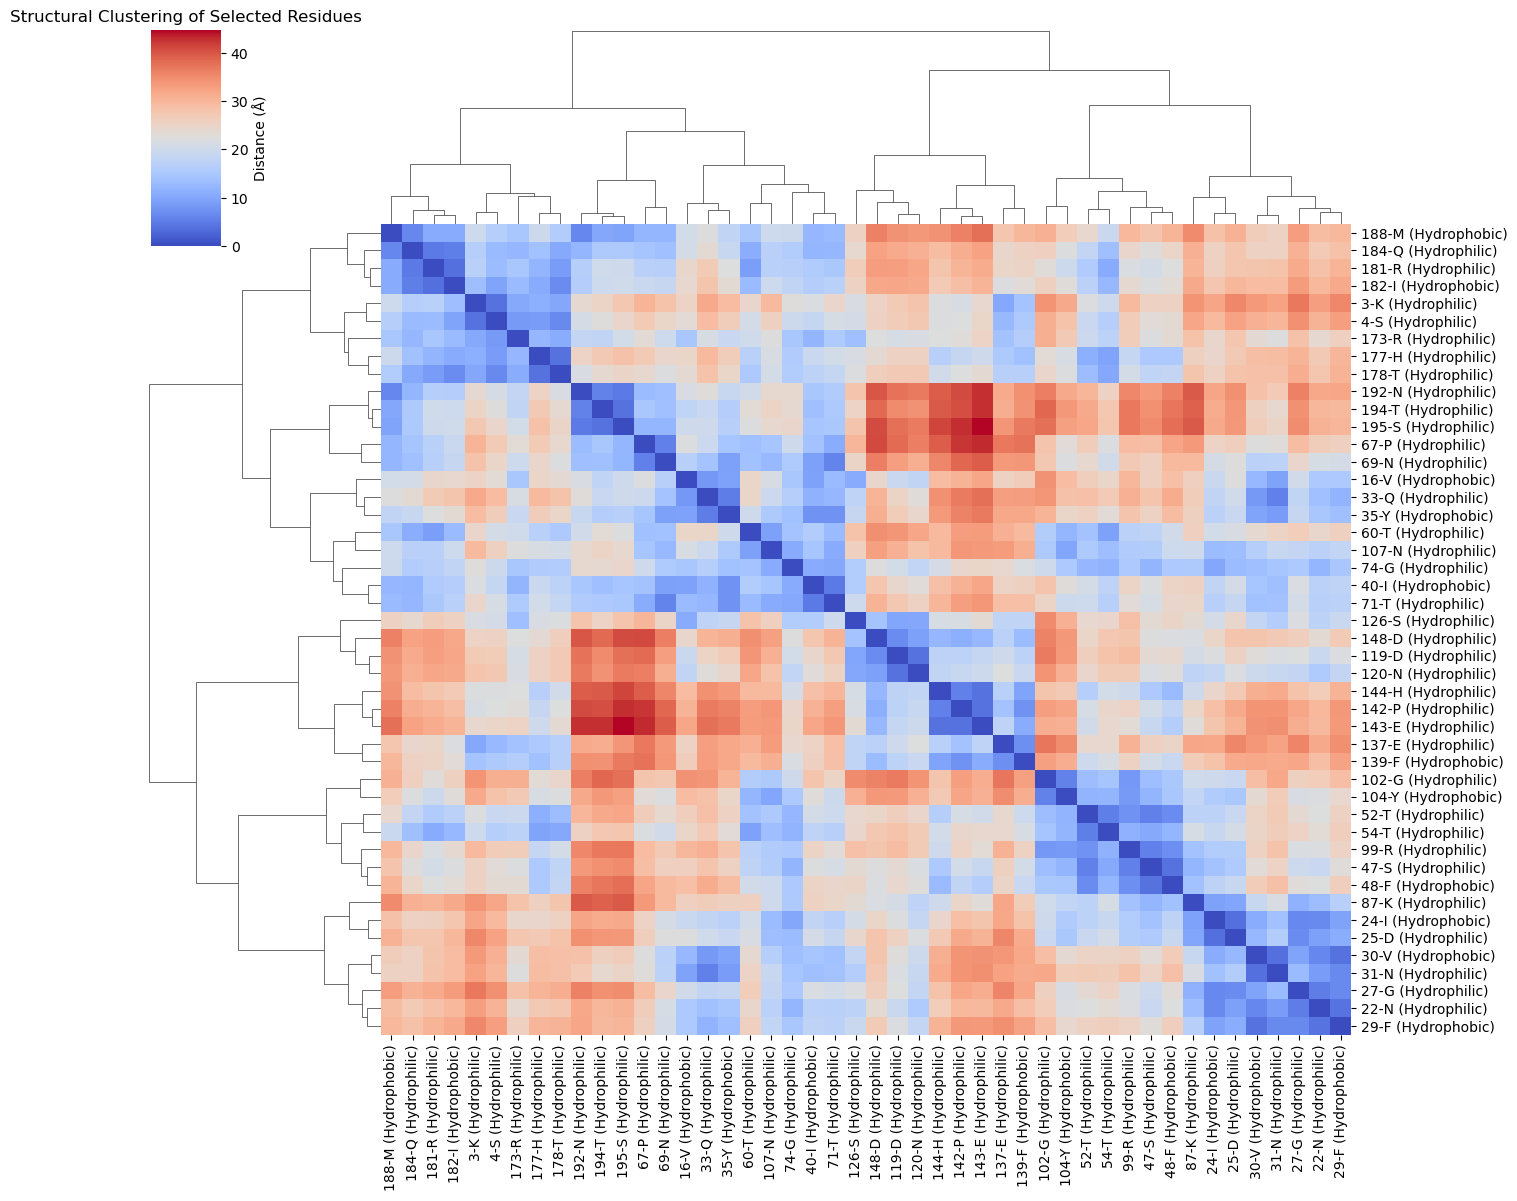

In [6]:
import csv
from Bio.PDB import PDBParser
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

# Input PDB file path
pdb_file = "/home/hp/nayanika/github/GPX6/prep_structures/original_mousecys.pdb"

# Residue mapping table (Position, Human Cys, Mouse Cys)
selected_residues = [
    (3, 'N', 'K'), (4, 'R', 'S'), (16, 'I', 'V'), (22, 'L', 'N'), (24, 'L', 'I'),
    (25, 'N', 'D'), (27, 'E', 'G'), (29, 'Y', 'F'), (30, 'I', 'V'), (31, 'Q', 'N'),
    (33, 'K', 'Q'), (35, 'F', 'Y'), (40, 'V', 'I'), (47, 'A', 'S'), (48, 'Y', 'F'),
    (52, 'A', 'T'), (54, 'Q', 'T'), (60, 'A', 'T'), (67, 'N', 'P'), (69, 'G', 'N'),
    (71, 'I', 'T'), (74, 'A', 'G'), (87, 'T', 'K'), (99, 'C', 'R'), (102, 'S', 'G'),
    (104, 'F', 'Y'), (107, 'S', 'N'), (119, 'E', 'D'), (120, 'K', 'N'), (126, 'T', 'S'),
    (137, 'D', 'E'), (139, 'L', 'F'), (142, 'S', 'P'), (143, 'S', 'E'), (144, 'Q', 'H'),
    (148, 'E', 'D'), (173, 'H', 'R'), (177, 'Q', 'H'), (178, 'A', 'T'), (181, 'S', 'R'),
    (182, 'T', 'I'), (184, 'K', 'Q'), (188, 'L', 'M'), (192, 'K', 'N'), (194, 'F', 'T'),
    (195, 'N', 'S')
]

# Define residue classes
hydrophobic = {'A', 'V', 'I', 'L', 'M', 'F', 'Y', 'W'}
hydrophilic = {'R', 'N', 'D', 'Q', 'E', 'K', 'S', 'T', 'C', 'H', 'G', 'P'}

# Define a function to get C-alpha coordinates
def get_residue_ca_coord(structure, chain_id, res_id):
    """Extract the C-alpha (CA) coordinate of a given residue."""
    try:
        residue = structure[0][chain_id][res_id]
        ca_atom = residue['CA']
        return np.array(ca_atom.coord)
    except KeyError:
        print(f"Residue {res_id} not found or does not have a CA atom.")
        return None

# Load the PDB structure
parser = PDBParser(QUIET=True)
structure = parser.get_structure("protein", pdb_file)

# Define chain ID (update as needed)
chain_id = 'X'

# Extract pairwise distances for selected residues
residue_coords = []
labels = []
for pos, human_res, mouse_res in selected_residues:
    coord = get_residue_ca_coord(structure, chain_id, pos)
    if coord is not None:
        residue_coords.append(coord)
        hydrophobicity = "Hydrophobic" if mouse_res in hydrophobic else "Hydrophilic"
        labels.append(f"{pos}-{mouse_res} ({hydrophobicity})")

# Compute pairwise distances
distance_matrix = squareform(pdist(residue_coords))

# Perform hierarchical clustering
linkage_matrix = linkage(distance_matrix, method='ward')

# Create a clustered heatmap
sns.clustermap(
    pd.DataFrame(distance_matrix, index=labels, columns=labels),
    row_linkage=linkage_matrix,
    col_linkage=linkage_matrix,
    cmap="coolwarm",
    cbar_kws={'label': 'Distance (Å)'},
    figsize=(14, 12)
)
plt.title("Structural Clustering of Selected Residues")
plt.show()


/home/hp/anaconda3/envs/openMM/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Residues with assigned clusters:
3-K (Hydrophilic) -> Cluster 1
4-S (Hydrophilic) -> Cluster 1
16-V (Hydrophobic) -> Cluster 2
22-N (Hydrophilic) -> Cluster 0
24-I (Hydrophobic) -> Cluster 0
25-D (Hydrophilic) -> Cluster 0
27-G (Hydrophilic) -> Cluster 0
29-F (Hydrophobic) -> Cluster 0
30-V (Hydrophobic) -> Cluster 0
31-N (Hydrophilic) -> Cluster 0
33-Q (Hydrophilic) -> Cluster 2
35-Y (Hydrophobic) -> Cluster 2
40-I (Hydrophobic) -> Cluster 2
47-S (Hydrophilic) -> Cluster 0
48-F (Hydrophobic) -> Cluster 0
52-T (Hydrophilic) -> Cluster 0
54-T (Hydrophilic) -> Cluster 0
60-T (Hydrophilic) -> Cluster 2
67-P (Hydrophilic) -> Cluster 2
69-N (Hydrophilic) -> Cluster 2
71-T (Hydrophilic) -> Cluster 2
74-G (Hydrophilic) -> Cluster 0
87-K (Hydrophilic) -> Cluster 0
99-R (Hydrophilic) -> Cluster 0
102-G (Hydrophilic) -> Cluster 0
104-Y (Hydrophobic) -> Cluster 0
107-N (Hydrophilic) -> Cluster 0
119-D (Hydrophilic) -> Cluster 1
120-N (Hydrophilic) -> Cluster 1
126-S (Hydrophilic) -> Cluster 1
137

/tmp/ipykernel_7449/2085517528.py:84: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distance_matrix, method='ward')


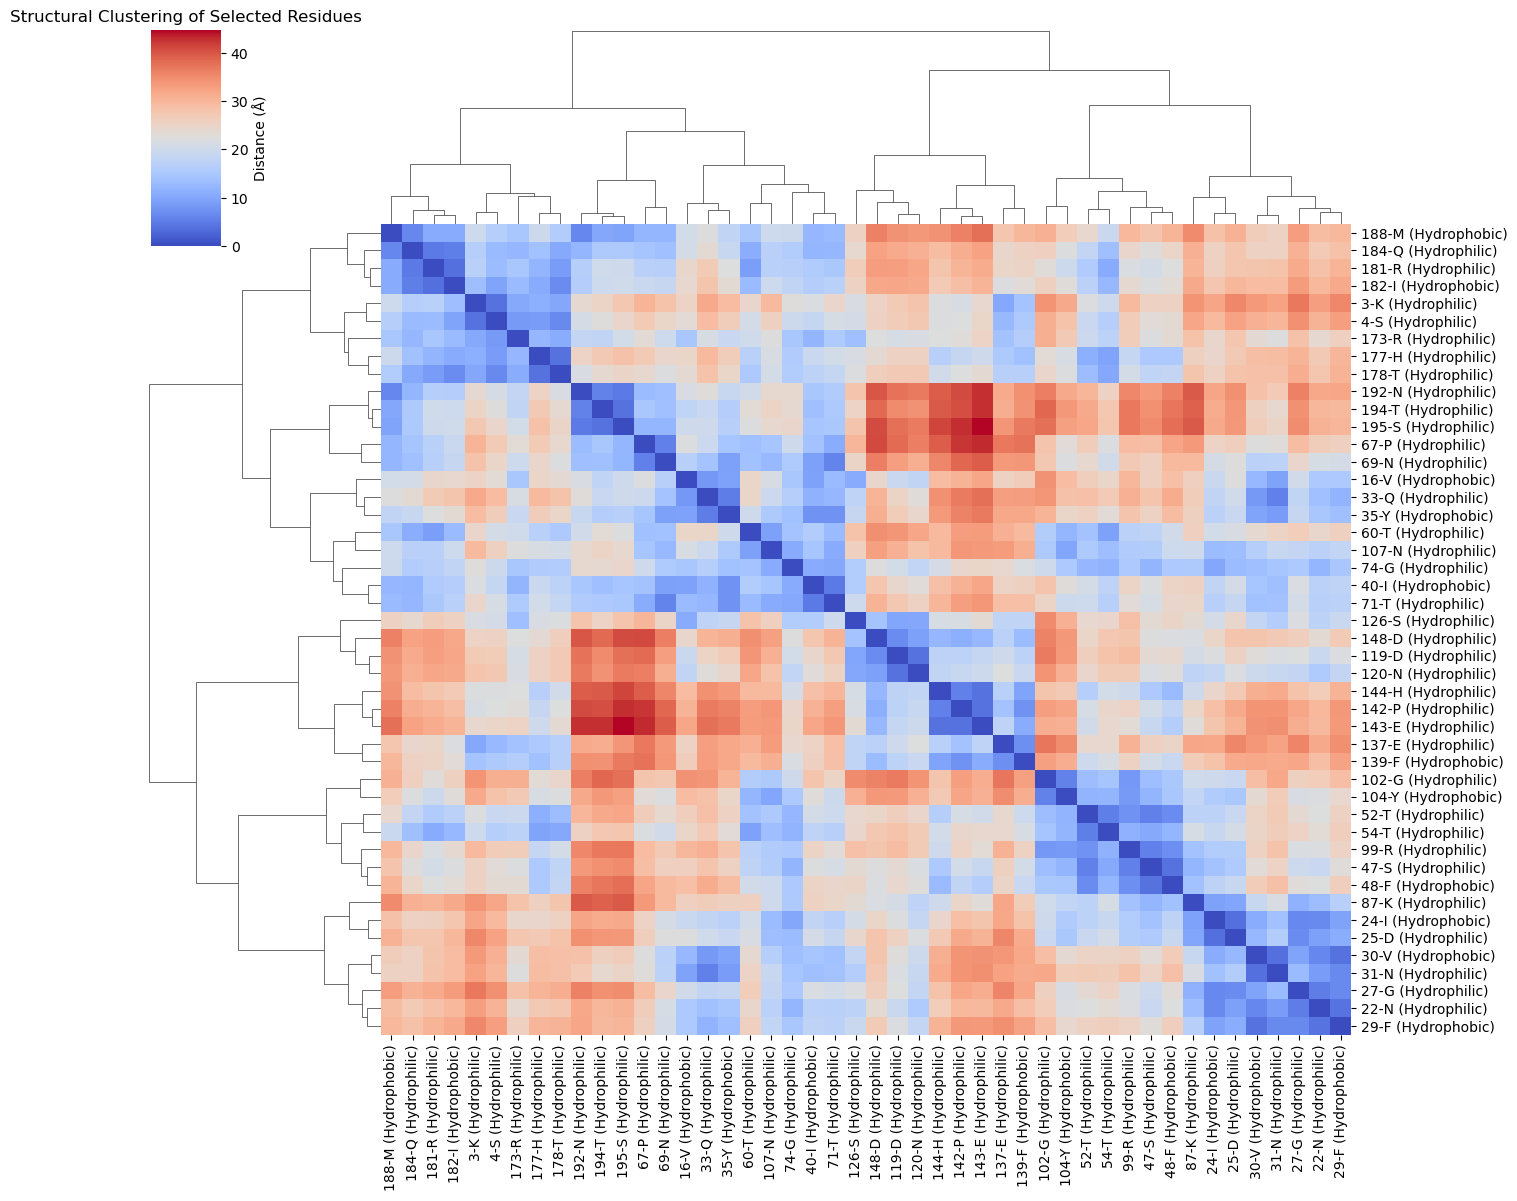

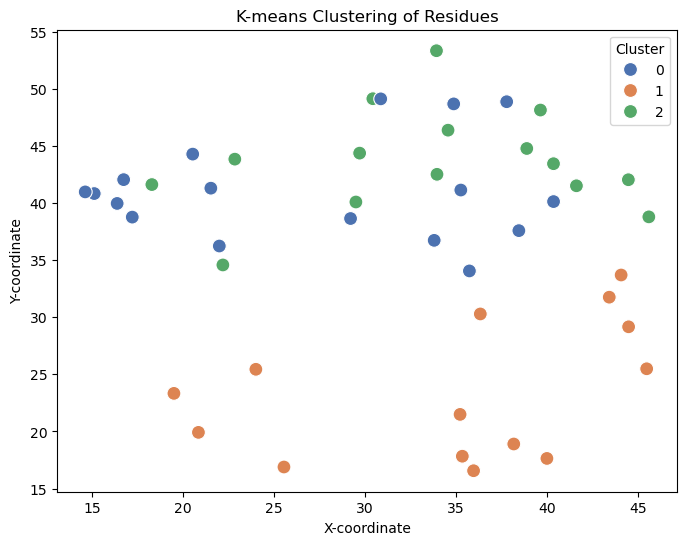

In [28]:
import csv
from Bio.PDB import PDBParser
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans

# Input PDB file path
pdb_file = "/home/hp/nayanika/github/GPX6/prep_structures/original_mousecys.pdb"

# Residue mapping table (Position, Human Cys, Mouse Cys)
selected_residues = [
    (3, 'N', 'K'), (4, 'R', 'S'), (16, 'I', 'V'), (22, 'L', 'N'), (24, 'L', 'I'),
    (25, 'N', 'D'), (27, 'E', 'G'), (29, 'Y', 'F'), (30, 'I', 'V'), (31, 'Q', 'N'),
    (33, 'K', 'Q'), (35, 'F', 'Y'), (40, 'V', 'I'), (47, 'A', 'S'), (48, 'Y', 'F'),
    (52, 'A', 'T'), (54, 'Q', 'T'), (60, 'A', 'T'), (67, 'N', 'P'), (69, 'G', 'N'),
    (71, 'I', 'T'), (74, 'A', 'G'), (87, 'T', 'K'), (99, 'C', 'R'), (102, 'S', 'G'),
    (104, 'F', 'Y'), (107, 'S', 'N'), (119, 'E', 'D'), (120, 'K', 'N'), (126, 'T', 'S'),
    (137, 'D', 'E'), (139, 'L', 'F'), (142, 'S', 'P'), (143, 'S', 'E'), (144, 'Q', 'H'),
    (148, 'E', 'D'), (173, 'H', 'R'), (177, 'Q', 'H'), (178, 'A', 'T'), (181, 'S', 'R'),
    (182, 'T', 'I'), (184, 'K', 'Q'), (188, 'L', 'M'), (192, 'K', 'N'), (194, 'F', 'T'),
    (195, 'N', 'S')
]

# Define residue classes
hydrophobic = {'A', 'V', 'I', 'L', 'M', 'F', 'Y', 'W'}
hydrophilic = {'R', 'N', 'D', 'Q', 'E', 'K', 'S', 'T', 'C', 'H', 'G', 'P'}

# Define a function to get C-alpha coordinates
def get_residue_ca_coord(structure, chain_id, res_id):
    """Extract the C-alpha (CA) coordinate of a given residue."""
    try:
        residue = structure[0][chain_id][res_id]
        ca_atom = residue['CA']
        return np.array(ca_atom.coord)
    except KeyError:
        print(f"Residue {res_id} not found or does not have a CA atom.")
        return None

# Load the PDB structure
parser = PDBParser(QUIET=True)
structure = parser.get_structure("protein", pdb_file)

# Define chain ID (update as needed)
chain_id = 'X'

# Extract pairwise distances for selected residues
residue_coords = []
labels = []
hydrophobicity_labels = []
for pos, human_res, mouse_res in selected_residues:
    coord = get_residue_ca_coord(structure, chain_id, pos)
    if coord is not None:
        residue_coords.append(coord)
        hydrophobicity = "Hydrophobic" if mouse_res in hydrophobic else "Hydrophilic"
        labels.append(f"{pos}-{mouse_res} ({hydrophobicity})")
        hydrophobicity_labels.append(1 if hydrophobicity == "Hydrophobic" else 0)

# Convert the list of coordinates to a NumPy array
residue_coords = np.array(residue_coords)

# Perform K-means clustering (assuming 3 clusters, you can modify this)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(residue_coords)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Store the clusters in the labels
labeled_residues = list(zip(labels, cluster_labels))

# Print the labeled residues with their cluster
print("Residues with assigned clusters:")
for label, cluster in labeled_residues:
    print(f"{label} -> Cluster {cluster}")

# Compute pairwise distances (for heatmap)
distance_matrix = squareform(pdist(residue_coords))

# Perform hierarchical clustering
linkage_matrix = linkage(distance_matrix, method='ward')

# Create a clustered heatmap
sns.clustermap(
    pd.DataFrame(distance_matrix, index=labels, columns=labels),
    row_linkage=linkage_matrix,
    col_linkage=linkage_matrix,
    cmap="coolwarm",
    cbar_kws={'label': 'Distance (Å)'},
    figsize=(14, 12)
)
plt.title("Structural Clustering of Selected Residues")
plt.show()

# Plot K-means clusters (visualizing the clusters)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=residue_coords[:, 0], y=residue_coords[:, 1], hue=cluster_labels, palette="deep", s=100)
plt.title("K-means Clustering of Residues")
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.legend(title="Cluster", loc="best")
plt.show()


/home/hp/anaconda3/envs/openMM/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Residues with assigned clusters:
3-K (Hydrophilic) -> Cluster 0
4-S (Hydrophilic) -> Cluster 0
16-V (Hydrophobic) -> Cluster 2
22-N (Hydrophilic) -> Cluster 2
24-I (Hydrophobic) -> Cluster 2
25-D (Hydrophilic) -> Cluster 2
27-G (Hydrophilic) -> Cluster 2
29-F (Hydrophobic) -> Cluster 2
30-V (Hydrophobic) -> Cluster 2
31-N (Hydrophilic) -> Cluster 2
33-Q (Hydrophilic) -> Cluster 2
35-Y (Hydrophobic) -> Cluster 2
40-I (Hydrophobic) -> Cluster 2
47-S (Hydrophilic) -> Cluster 0
48-F (Hydrophobic) -> Cluster 2
52-T (Hydrophilic) -> Cluster 0
54-T (Hydrophilic) -> Cluster 0
60-T (Hydrophilic) -> Cluster 0
67-P (Hydrophilic) -> Cluster 0
69-N (Hydrophilic) -> Cluster 0
71-T (Hydrophilic) -> Cluster 0
74-G (Hydrophilic) -> Cluster 0
87-K (Hydrophilic) -> Cluster 2
99-R (Hydrophilic) -> Cluster 0
102-G (Hydrophilic) -> Cluster 0
104-Y (Hydrophobic) -> Cluster 2
107-N (Hydrophilic) -> Cluster 0
119-D (Hydrophilic) -> Cluster 1
120-N (Hydrophilic) -> Cluster 1
126-S (Hydrophilic) -> Cluster 0
137

/home/hp/anaconda3/envs/openMM/lib/python3.8/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/home/hp/anaconda3/envs/openMM/lib/python3.8/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


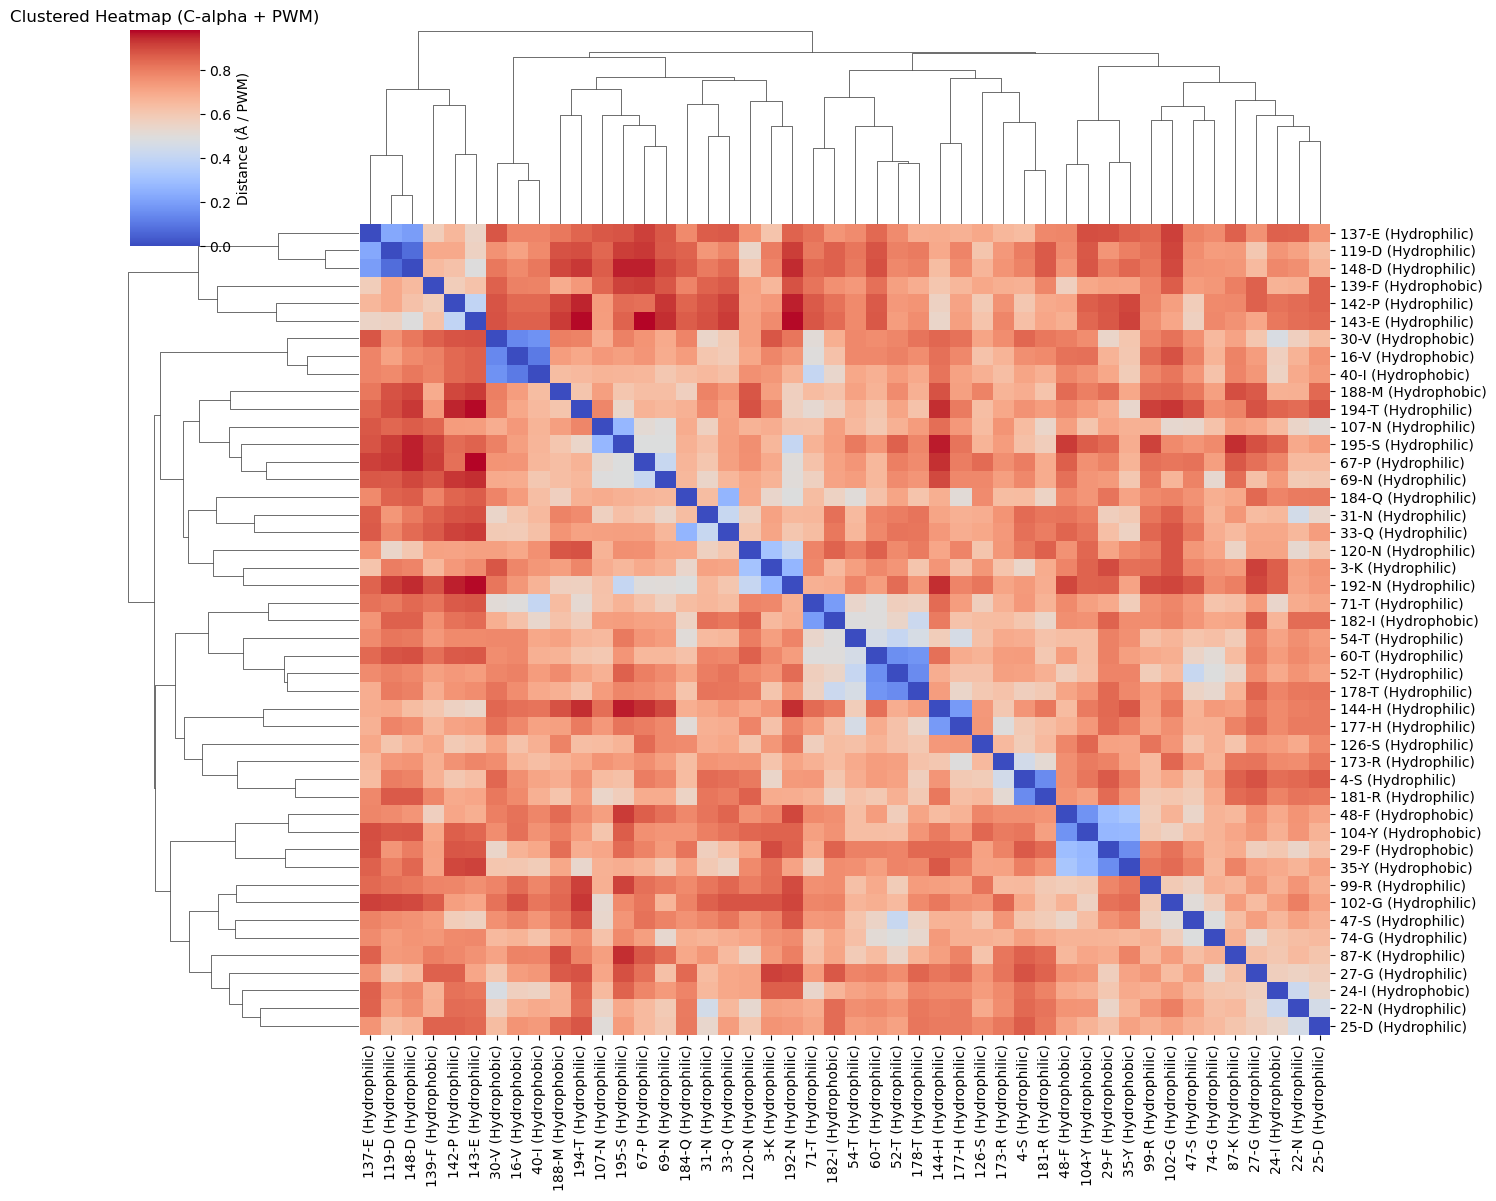

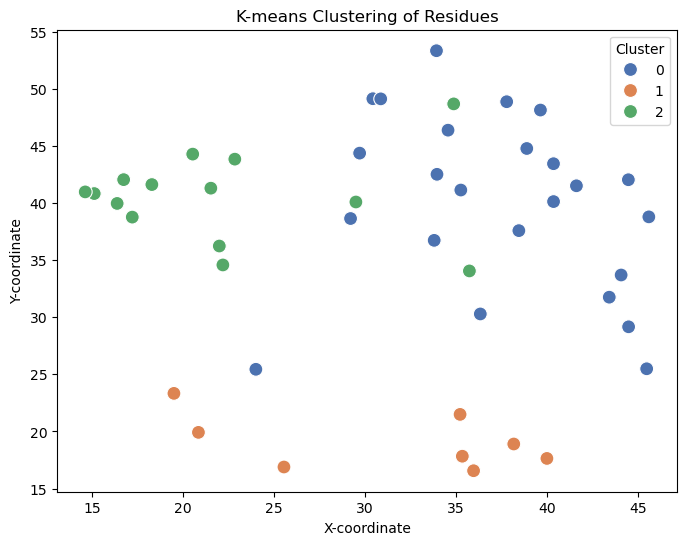

In [35]:
import csv
from Bio.PDB import PDBParser
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment

# Input PDB file path
pdb_file = "/home/hp/nayanika/github/GPX6/prep_structures/original_mousecys.pdb"

# Residue mapping table (Position, Human Cys, Mouse Cys)
selected_residues = [
    (3, 'N', 'K'), (4, 'R', 'S'), (16, 'I', 'V'), (22, 'L', 'N'), (24, 'L', 'I'),
    (25, 'N', 'D'), (27, 'E', 'G'), (29, 'Y', 'F'), (30, 'I', 'V'), (31, 'Q', 'N'),
    (33, 'K', 'Q'), (35, 'F', 'Y'), (40, 'V', 'I'), (47, 'A', 'S'), (48, 'Y', 'F'),
    (52, 'A', 'T'), (54, 'Q', 'T'), (60, 'A', 'T'), (67, 'N', 'P'), (69, 'G', 'N'),
    (71, 'I', 'T'), (74, 'A', 'G'), (87, 'T', 'K'), (99, 'C', 'R'), (102, 'S', 'G'),
    (104, 'F', 'Y'), (107, 'S', 'N'), (119, 'E', 'D'), (120, 'K', 'N'), (126, 'T', 'S'),
    (137, 'D', 'E'), (139, 'L', 'F'), (142, 'S', 'P'), (143, 'S', 'E'), (144, 'Q', 'H'),
    (148, 'E', 'D'), (173, 'H', 'R'), (177, 'Q', 'H'), (178, 'A', 'T'), (181, 'S', 'R'),
    (182, 'T', 'I'), (184, 'K', 'Q'), (188, 'L', 'M'), (192, 'K', 'N'), (194, 'F', 'T'),
    (195, 'N', 'S')
]

# Define residue classes
hydrophobic = {'A', 'V', 'I', 'L', 'M', 'F', 'Y', 'W'}
hydrophilic = {'R', 'N', 'D', 'Q', 'E', 'K', 'S', 'T', 'C', 'H', 'G', 'P'}

# Function to clean sequences by removing non-amino acid characters
def clean_sequence(sequence):
    amino_acids = "ACDEFGHIKLMNPQRSTVWXY"
    return ''.join([residue for residue in sequence if residue in amino_acids])

# Function to build cleaned sequences
def build_clean_sequence(residue_mapping):
    mouse_seq = ""
    human_seq = ""
    for _, human_res, mouse_res in residue_mapping:
        # Clean both human and mouse residues
        human_seq += clean_sequence(human_res)
        mouse_seq += clean_sequence(mouse_res)
    return mouse_seq, human_seq

# Cleaned sequences for mouse and human
mouse_seq, human_seq = build_clean_sequence(selected_residues)

# Create MultipleSeqAlignment object
sequences = [
    SeqRecord(Seq(mouse_seq), id="Mouse"),
    SeqRecord(Seq(human_seq), id="Human")
]

alignment = MultipleSeqAlignment(sequences)

# Calculate the Position Weight Matrix (PWM)
def calculate_pwm(alignment, amino_acids, selected_residues):
    pwm = np.zeros((len(amino_acids), len(selected_residues)))  # Shape: (Amino acids, Residue positions)
    for i, record in enumerate(alignment):
        for j, residue in enumerate(str(record.seq)):
            if residue in amino_acids:
                pwm[amino_acids.index(residue), j] += 1
    pwm /= pwm.sum(axis=0, keepdims=True)  # Normalize the PWM across residue positions
    return pwm

# Build the PWM
amino_acids = "ACDEFGHIKLMNPQRSTVWXY"
pwm = calculate_pwm(alignment, amino_acids, selected_residues)

# Compute pairwise distance matrix (adjusted for clustering)
def compute_distance_matrix(pwm):
    # Flatten PWM to calculate pairwise distances
    pwm_reshaped = pwm.T  # Shape (Residue positions, Amino acids)
    distance_matrix_pwm = np.linalg.norm(pwm_reshaped[:, None] - pwm_reshaped, axis=2)  # Pairwise distances for residues
    return distance_matrix_pwm

# Generate distance matrix from PWM
distance_matrix_pwm = compute_distance_matrix(pwm)

# Define a function to get C-alpha coordinates
def get_residue_ca_coord(structure, chain_id, res_id):
    """Extract the C-alpha (CA) coordinate of a given residue."""
    try:
        residue = structure[0][chain_id][res_id]
        ca_atom = residue['CA']
        return np.array(ca_atom.coord)
    except KeyError:
        print(f"Residue {res_id} not found or does not have a CA atom.")
        return None

# Load the PDB structure
parser = PDBParser(QUIET=True)
structure = parser.get_structure("protein", pdb_file)

# Define chain ID (update as needed)
chain_id = 'X'

# Extract pairwise distances for selected residues
residue_coords = []
labels = []
hydrophobicity_labels = []
for pos, human_res, mouse_res in selected_residues:
    coord = get_residue_ca_coord(structure, chain_id, pos)
    if coord is not None:
        residue_coords.append(coord)
        hydrophobicity = "Hydrophobic" if mouse_res in hydrophobic else "Hydrophilic"
        labels.append(f"{pos}-{mouse_res} ({hydrophobicity})")
        hydrophobicity_labels.append(1 if hydrophobicity == "Hydrophobic" else 0)

# Convert the list of coordinates to a NumPy array
residue_coords = np.array(residue_coords)

# Compute pairwise distances (for C-alpha atoms)
distance_matrix_ca = squareform(pdist(residue_coords))

# Combine both distance matrices (C-alpha + PWM)
# Ensure the matrices have the same shape before combining
assert distance_matrix_ca.shape[0] == distance_matrix_pwm.shape[0], \
    "Distance matrices must have the same size (number of residues)"

# Normalize both matrices (optional)
distance_matrix_ca = distance_matrix_ca / np.max(distance_matrix_ca)
distance_matrix_pwm = distance_matrix_pwm / np.max(distance_matrix_pwm)

# Combine the matrices (you can adjust the weight based on importance)
combined_distance_matrix = (distance_matrix_ca + distance_matrix_pwm) / 2

# Perform K-means clustering (3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(combined_distance_matrix)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Store the clusters in the labels
labeled_residues = list(zip(labels, cluster_labels))

# Print the labeled residues with their cluster
print("Residues with assigned clusters:")
for label, cluster in labeled_residues:
    print(f"{label} -> Cluster {cluster}")

# Create a clustered heatmap for combined distance
sns.clustermap(
    pd.DataFrame(combined_distance_matrix, index=labels, columns=labels),
    cmap="coolwarm",
    cbar_kws={'label': 'Distance (Å / PWM)'},
    figsize=(14, 12)
)
plt.title("Clustered Heatmap (C-alpha + PWM)")
plt.show()

# Plot K-means clusters (visualizing the clusters)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=residue_coords[:, 0], y=residue_coords[:, 1], hue=cluster_labels, palette="deep", s=100)
plt.title("K-means Clustering of Residues")
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.legend(title="Cluster", loc="best")
plt.show()


/home/hp/anaconda3/envs/openMM/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans Residue Clusters:
3-K: Cluster 0
4-S: Cluster 0
16-V: Cluster 0
22-N: Cluster 0
24-I: Cluster 0
25-D: Cluster 0
27-G: Cluster 0
29-F: Cluster 0
30-V: Cluster 0
31-N: Cluster 0
33-Q: Cluster 0
35-Y: Cluster 0
40-I: Cluster 0
47-S: Cluster 0
48-F: Cluster 0
52-T: Cluster 0
54-T: Cluster 0
60-T: Cluster 0
67-P: Cluster 0
69-N: Cluster 0
71-T: Cluster 0
74-G: Cluster 0
87-K: Cluster 0
99-R: Cluster 0
102-G: Cluster 0
104-Y: Cluster 0
107-N: Cluster 0
119-D: Cluster 1
120-N: Cluster 1
126-S: Cluster 1
137-E: Cluster 1
139-F: Cluster 1
142-P: Cluster 1
143-E: Cluster 1
144-H: Cluster 1
148-D: Cluster 1
173-R: Cluster 2
177-H: Cluster 2
178-T: Cluster 2
181-R: Cluster 2
182-I: Cluster 2
184-Q: Cluster 2
188-M: Cluster 2
192-N: Cluster 2
194-T: Cluster 2
195-S: Cluster 2


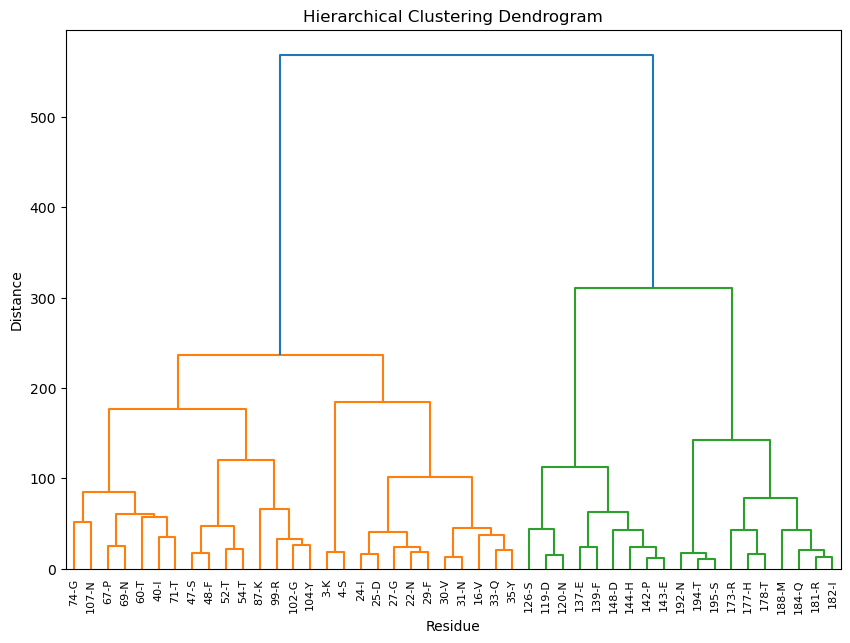

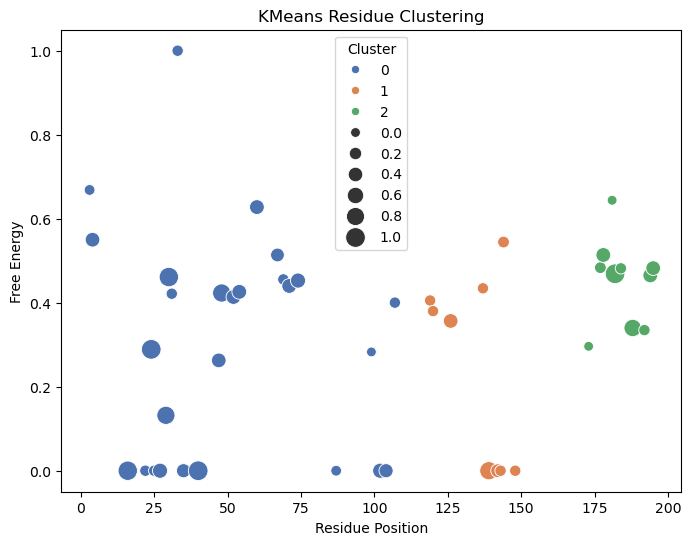

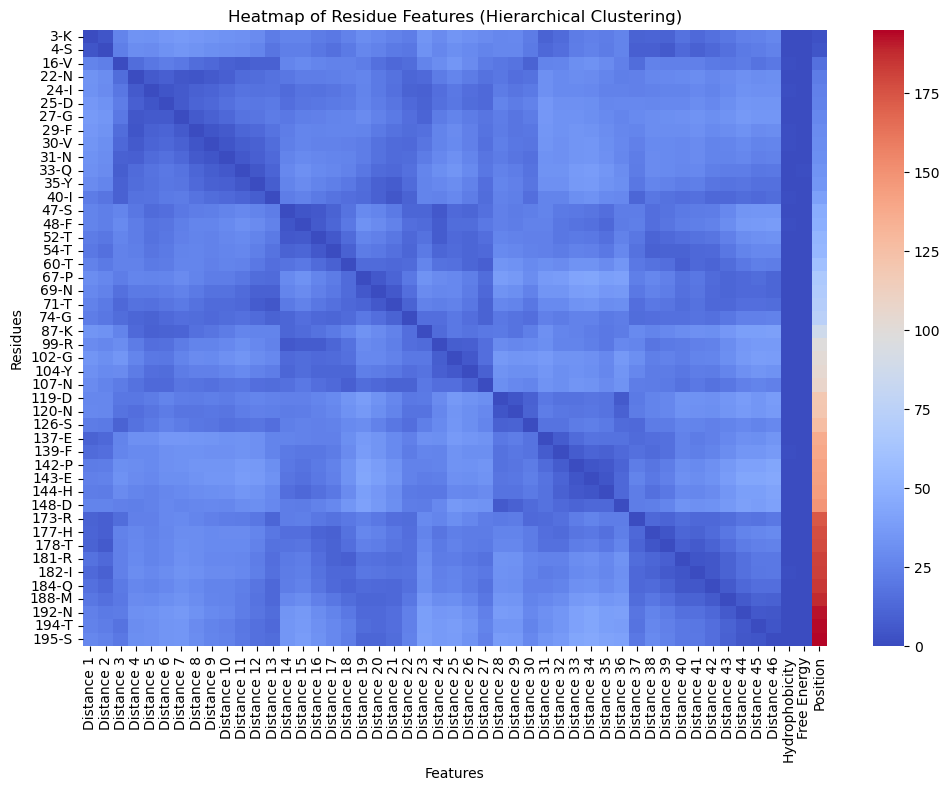

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans
from Bio.PDB import PDBParser

# Input PDB file path
pdb_file = "/home/hp/nayanika/github/GPX6/prep_structures/original_mousecys.pdb"

# Residue mapping table (Position, Human Cys, Mouse Cys)
selected_residues = [
    (3, 'N', 'K'), (4, 'R', 'S'), (16, 'I', 'V'), (22, 'L', 'N'), (24, 'L', 'I'),
    (25, 'N', 'D'), (27, 'E', 'G'), (29, 'Y', 'F'), (30, 'I', 'V'), (31, 'Q', 'N'),
    (33, 'K', 'Q'), (35, 'F', 'Y'), (40, 'V', 'I'), (47, 'A', 'S'), (48, 'Y', 'F'),
    (52, 'A', 'T'), (54, 'Q', 'T'), (60, 'A', 'T'), (67, 'N', 'P'), (69, 'G', 'N'),
    (71, 'I', 'T'), (74, 'A', 'G'), (87, 'T', 'K'), (99, 'C', 'R'), (102, 'S', 'G'),
    (104, 'F', 'Y'), (107, 'S', 'N'), (119, 'E', 'D'), (120, 'K', 'N'), (126, 'T', 'S'),
    (137, 'D', 'E'), (139, 'L', 'F'), (142, 'S', 'P'), (143, 'S', 'E'), (144, 'Q', 'H'),
    (148, 'E', 'D'), (173, 'H', 'R'), (177, 'Q', 'H'), (178, 'A', 'T'), (181, 'S', 'R'),
    (182, 'T', 'I'), (184, 'K', 'Q'), (188, 'L', 'M'), (192, 'K', 'N'), (194, 'F', 'T'),
    (195, 'N', 'S')
]

# Hydrophobicity scale (normalized values from Kyte-Doolittle)
hydrophobicity_scale = {
    'A': 1.8, 'R': -4.5, 'N': -3.5, 'D': -3.5, 'C': 2.5, 'Q': -3.5, 'E': -3.5,
    'G': -0.4, 'H': -3.2, 'I': 4.5, 'L': 3.8, 'K': -3.9, 'M': 1.9, 'F': 2.8,
    'P': -1.6, 'S': -0.8, 'T': -0.7, 'W': -0.9, 'Y': -1.3, 'V': 4.2
}

# Free energy values
free_energy_dict = {
    3: 24.64, 4: 22.52, 16: None, 22: 12.68, 24: 17.85, 25: None, 27: None,
    29: 15.04, 30: 20.93, 31: 20.22, 33: 30.57, 35: None, 40: None, 47: 17.38,
    48: 20.25, 52: 20.08, 54: 20.30, 60: 23.91, 67: 21.87, 69: 20.83, 71: 20.55,
    74: 20.78, 87: None, 99: 17.74, 102: None, 104: None, 107: 19.84, 119: 19.93,
    120: 19.48, 126: 19.06, 137: 20.45, 139: None, 142: None, 143: None, 144: 22.42,
    148: None, 173: 17.98, 177: 21.33, 178: 21.87, 181: 24.20, 182: 21.07, 184: 21.30,
    188: 18.76, 192: 18.67, 194: 21.00, 195: 21.31
}

# Load PDB file
parser = PDBParser(QUIET=True)
structure = parser.get_structure("protein", pdb_file)

# Get residue features
chain_id = 'X'
features = []
labels = []

for pos, human_res, mouse_res in selected_residues:
    try:
        residue = structure[0][chain_id][pos]
        ca_coord = residue['CA'].coord
    except KeyError:
        continue

    hydrophobicity = hydrophobicity_scale.get(mouse_res, 0)
    free_energy = free_energy_dict.get(pos, None)
    free_energy = free_energy if free_energy is not None else np.nan
    features.append((pos, ca_coord, hydrophobicity, free_energy))
    labels.append(f"{pos}-{mouse_res}")

# Process features
positions = np.array([f[0] for f in features])
coords = np.array([f[1] for f in features])
hydrophobicity = np.array([f[2] for f in features])
free_energy = np.array([f[3] for f in features])

# Compute distance matrix
distance_matrix = squareform(pdist(coords))

# Normalize features
hydrophobicity = (hydrophobicity - np.min(hydrophobicity)) / (np.max(hydrophobicity) - np.min(hydrophobicity))
free_energy = np.nan_to_num((free_energy - np.nanmin(free_energy)) / (np.nanmax(free_energy) - np.nanmin(free_energy)))

# Combine features into a feature matrix
combined_features = np.column_stack((distance_matrix, hydrophobicity[:, None], free_energy[:, None], positions[:, None]))

# Perform KMeans clustering (optional: change n_clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(combined_features)
kmeans_labels = kmeans.labels_

# Annotate residues with KMeans cluster
kmeans_labeled_residues = list(zip(labels, kmeans_labels))

print("KMeans Residue Clusters:")
for label, cluster in kmeans_labeled_residues:
    print(f"{label}: Cluster {cluster}")

# Perform hierarchical clustering
linked = linkage(combined_features, method='ward')

# Create a dendrogram for hierarchical clustering
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=labels, orientation='top', distance_sort='ascending', show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Residue")
plt.ylabel("Distance")
plt.show()

# Visualize KMeans clustering with scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=positions,
    y=free_energy,
    hue=kmeans_labels,
    palette="deep",
    size=hydrophobicity,
    sizes=(50, 200)
)
plt.title("KMeans Residue Clustering")
plt.xlabel("Residue Position")
plt.ylabel("Free Energy")
plt.legend(title="Cluster")
plt.show()

# Visualize with heatmap for both methods
# Create a DataFrame for heatmap
feature_df = pd.DataFrame(
    combined_features,
    columns=[f"Distance {i+1}" for i in range(distance_matrix.shape[1])] + ["Hydrophobicity", "Free Energy", "Position"]
)

# Plot the heatmap for hierarchical clustering
plt.figure(figsize=(12, 8))
sns.heatmap(
    feature_df,
    cmap="coolwarm",
    annot=False,
    xticklabels=feature_df.columns,
    yticklabels=labels
)
plt.title("Heatmap of Residue Features (Hierarchical Clustering)")
plt.xlabel("Features")
plt.ylabel("Residues")
plt.show()


/home/hp/anaconda3/envs/openMM/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Good Clusters (Threshold: 30.0):
Cluster 0: ['16-V', '22-N', '24-I', '25-D', '27-G', '29-F', '30-V', '31-N', '33-Q', '35-Y', '126-S']
Cluster 1: ['47-S', '48-F', '52-T', '54-T', '74-G', '87-K', '99-R', '102-G', '104-Y', '107-N']
Cluster 2: ['119-D', '120-N', '137-E', '139-F', '142-P', '143-E', '144-H', '148-D']
Cluster 3: ['40-I', '67-P', '69-N', '71-T', '188-M', '192-N', '194-T', '195-S']
Cluster 4: ['3-K', '4-S', '60-T', '173-R', '177-H', '178-T', '181-R', '182-I', '184-Q']


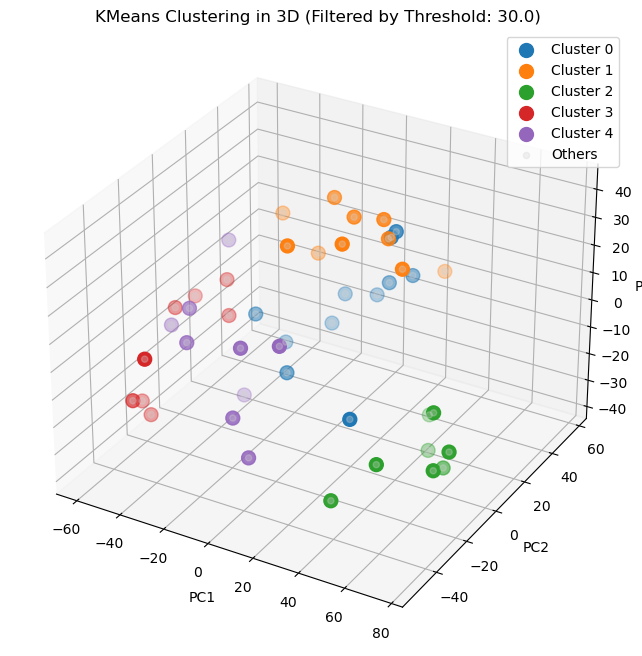

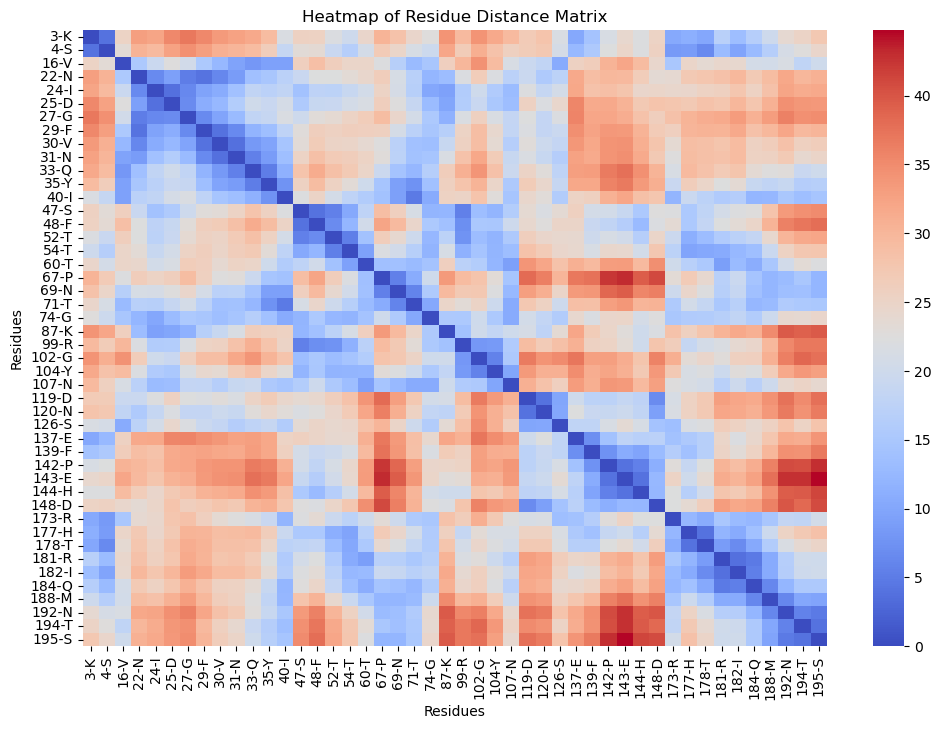

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting
from Bio.PDB import PDBParser

# Input PDB file path
pdb_file = "/home/hp/nayanika/github/GPX6/prep_structures/original_mousecys.pdb"

# Residue mapping table (Position, Human Cys, Mouse Cys)
selected_residues = [
    (3, 'N', 'K'), (4, 'R', 'S'), (16, 'I', 'V'), (22, 'L', 'N'), (24, 'L', 'I'),
    (25, 'N', 'D'), (27, 'E', 'G'), (29, 'Y', 'F'), (30, 'I', 'V'), (31, 'Q', 'N'),
    (33, 'K', 'Q'), (35, 'F', 'Y'), (40, 'V', 'I'), (47, 'A', 'S'), (48, 'Y', 'F'),
    (52, 'A', 'T'), (54, 'Q', 'T'), (60, 'A', 'T'), (67, 'N', 'P'), (69, 'G', 'N'),
    (71, 'I', 'T'), (74, 'A', 'G'), (87, 'T', 'K'), (99, 'C', 'R'), (102, 'S', 'G'),
    (104, 'F', 'Y'), (107, 'S', 'N'), (119, 'E', 'D'), (120, 'K', 'N'), (126, 'T', 'S'),
    (137, 'D', 'E'), (139, 'L', 'F'), (142, 'S', 'P'), (143, 'S', 'E'), (144, 'Q', 'H'),
    (148, 'E', 'D'), (173, 'H', 'R'), (177, 'Q', 'H'), (178, 'A', 'T'), (181, 'S', 'R'),
    (182, 'T', 'I'), (184, 'K', 'Q'), (188, 'L', 'M'), (192, 'K', 'N'), (194, 'F', 'T'),
    (195, 'N', 'S')
]

# Load PDB file
parser = PDBParser(QUIET=True)
structure = parser.get_structure("protein", pdb_file)

# Get residue features
chain_id = 'X'
features = []
labels = []

for pos, human_res, mouse_res in selected_residues:
    try:
        residue = structure[0][chain_id][pos]
        ca_coord = residue['CA'].coord
    except KeyError:
        continue

    features.append((pos, ca_coord))
    labels.append(f"{pos}-{mouse_res}")

# Process features
positions = np.array([f[0] for f in features])
coords = np.array([f[1] for f in features])

# Compute distance matrix
distance_matrix = squareform(pdist(coords))

# Perform KMeans clustering only on the distance matrix
kmeans = KMeans(n_clusters=5, random_state=42)  # Use a higher cluster count to refine results
kmeans.fit(distance_matrix)
kmeans_labels = kmeans.labels_

# Define a function to filter clusters based on a threshold
def filter_clusters(distance_matrix, kmeans_labels, threshold):
    cluster_members = {i: [] for i in np.unique(kmeans_labels)}
    for idx, cluster in enumerate(kmeans_labels):
        cluster_members[cluster].append(idx)

    good_clusters = []
    for cluster, members in cluster_members.items():
        intra_distances = distance_matrix[np.ix_(members, members)]
        max_intra_distance = np.max(intra_distances)
        if max_intra_distance <= threshold:
            good_clusters.append((cluster, members))

    return good_clusters

# Set the threshold for intra-cluster distance
threshold = 30.0  # Adjust this value as needed
good_clusters = filter_clusters(distance_matrix, kmeans_labels, threshold)

print(f"Good Clusters (Threshold: {threshold}):")
for cluster, members in good_clusters:
    print(f"Cluster {cluster}: {[labels[i] for i in members]}")

# Project distance matrix into 3D using PCA
pca = PCA(n_components=3)
distance_3d = pca.fit_transform(distance_matrix)

# Visualize KMeans clustering with 3D PCA projection
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot good clusters in 3D
for cluster, members in good_clusters:
    ax.scatter(
        distance_3d[members, 0],
        distance_3d[members, 1],
        distance_3d[members, 2],
        label=f"Cluster {cluster}",
        s=100
    )
# Add all points for context
ax.scatter(
    distance_3d[:, 0],
    distance_3d[:, 1],
    distance_3d[:, 2],
    c="lightgray", alpha=0.3, label="Others"
)

ax.set_title(f"KMeans Clustering in 3D (Filtered by Threshold: {threshold})")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.legend()
plt.show()

# Visualize heatmap for the distance matrix
plt.figure(figsize=(12, 8))
sns.heatmap(
    distance_matrix,
    cmap="coolwarm",
    annot=False,
    xticklabels=labels,
    yticklabels=labels
)
plt.title("Heatmap of Residue Distance Matrix")
plt.xlabel("Residues")
plt.ylabel("Residues")
plt.show()


/home/hp/anaconda3/envs/openMM/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/tmp/ipykernel_50503/2623930861.py:134: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=np.min(feature_colors), vmax=np.max(feature_colors))), label=color_label)


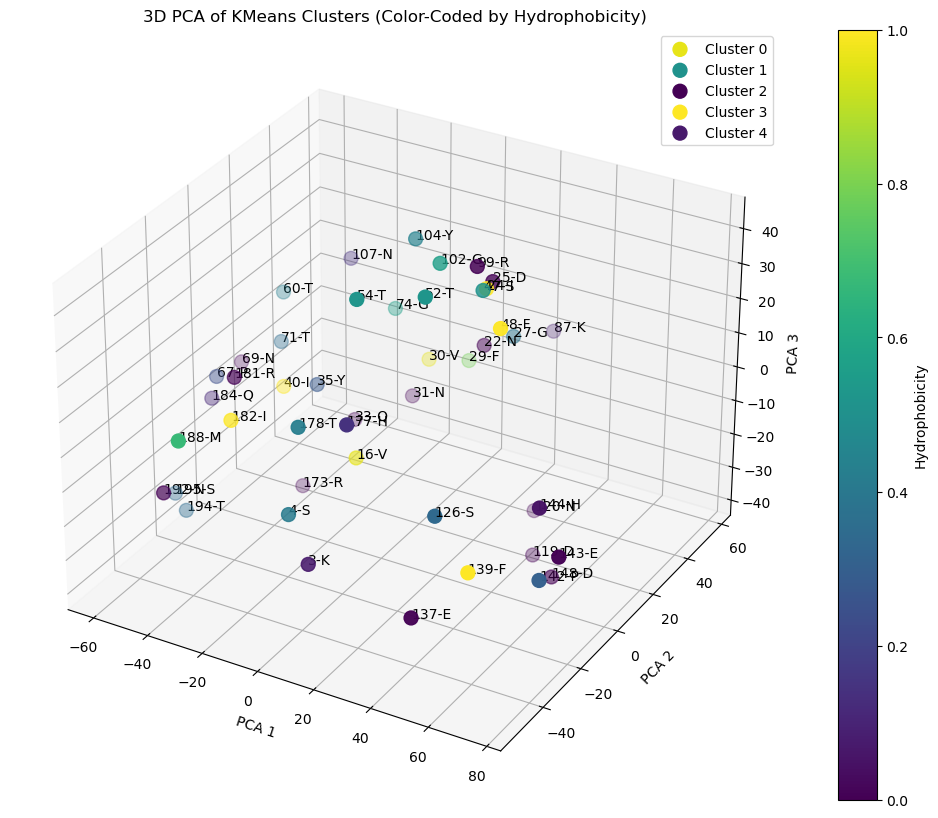

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting
from Bio.PDB import PDBParser

# Input PDB file path
pdb_file = "/home/hp/nayanika/github/GPX6/prep_structures/original_mousecys.pdb"

# Residue mapping table (Position, Human Cys, Mouse Cys)
selected_residues = [
    (3, 'N', 'K'), (4, 'R', 'S'), (16, 'I', 'V'), (22, 'L', 'N'), (24, 'L', 'I'),
    (25, 'N', 'D'), (27, 'E', 'G'), (29, 'Y', 'F'), (30, 'I', 'V'), (31, 'Q', 'N'),
    (33, 'K', 'Q'), (35, 'F', 'Y'), (40, 'V', 'I'), (47, 'A', 'S'), (48, 'Y', 'F'),
    (52, 'A', 'T'), (54, 'Q', 'T'), (60, 'A', 'T'), (67, 'N', 'P'), (69, 'G', 'N'),
    (71, 'I', 'T'), (74, 'A', 'G'), (87, 'T', 'K'), (99, 'C', 'R'), (102, 'S', 'G'),
    (104, 'F', 'Y'), (107, 'S', 'N'), (119, 'E', 'D'), (120, 'K', 'N'), (126, 'T', 'S'),
    (137, 'D', 'E'), (139, 'L', 'F'), (142, 'S', 'P'), (143, 'S', 'E'), (144, 'Q', 'H'),
    (148, 'E', 'D'), (173, 'H', 'R'), (177, 'Q', 'H'), (178, 'A', 'T'), (181, 'S', 'R'),
    (182, 'T', 'I'), (184, 'K', 'Q'), (188, 'L', 'M'), (192, 'K', 'N'), (194, 'F', 'T'),
    (195, 'N', 'S')
]

# Load PDB file
parser = PDBParser(QUIET=True)
structure = parser.get_structure("protein", pdb_file)

# Get residue features
chain_id = 'X'
features = []
labels = []

for pos, human_res, mouse_res in selected_residues:
    try:
        residue = structure[0][chain_id][pos]
        ca_coord = residue['CA'].coord
    except KeyError:
        continue

    features.append((pos, ca_coord))
    labels.append(f"{pos}-{mouse_res}")

# Process features
positions = np.array([f[0] for f in features])
coords = np.array([f[1] for f in features])

# Compute distance matrix
distance_matrix = squareform(pdist(coords))

# Perform KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(distance_matrix)
kmeans_labels = kmeans.labels_

# Hydrophobicity scale (normalized values from Kyte-Doolittle)
hydrophobicity_scale = {
    'A': 1.8, 'R': -4.5, 'N': -3.5, 'D': -3.5, 'C': 2.5, 'Q': -3.5, 'E': -3.5,
    'G': -0.4, 'H': -3.2, 'I': 4.5, 'L': 3.8, 'K': -3.9, 'M': 1.9, 'F': 2.8,
    'P': -1.6, 'S': -0.8, 'T': -0.7, 'W': -0.9, 'Y': -1.3, 'V': 4.2
}

# Map the hydrophobicity values to the residues
hydrophobicity_values = np.array([hydrophobicity_scale[mouse_res] for _, _, mouse_res in selected_residues])

# Free energy values (some might be missing)
free_energy_dict = {
    3: 24.64, 4: 22.52, 16: None, 22: 12.68, 24: 17.85, 25: None, 27: None,
    29: 15.04, 30: 20.93, 31: 20.22, 33: 30.57, 35: None, 40: None, 47: 17.38,
    48: 20.25, 52: 20.08, 54: 20.30, 60: 23.91, 67: 21.87, 69: 20.83, 71: 20.55,
    74: 20.78, 87: None, 99: 17.74, 102: None, 104: None, 107: 19.84, 119: 19.93,
    120: 19.48, 126: 19.06, 137: 20.45, 139: None, 142: None, 143: None, 144: 22.42,
    148: None, 173: 17.98, 177: 21.33, 178: 21.87, 181: 24.20, 182: 21.07, 184: 21.30,
    188: 18.76, 192: 18.67, 194: 21.00, 195: 21.31
}

# Replace None with NaN for free energy values
free_energy_values = np.array([free_energy_dict.get(pos, np.nan) for pos, _, _ in selected_residues])

# Normalize the feature values for color mapping, handling NaN values
def normalize_feature_values(values):
    values = np.array(values, dtype=float)  # Convert to float
    valid_values = values[~np.isnan(values)]  # Extract valid values

    if len(valid_values) > 0:
        return (values - np.nanmin(valid_values)) / (np.nanmax(valid_values) - np.nanmin(valid_values))
    else:
        return values

hydrophobicity_normalized = normalize_feature_values(hydrophobicity_values)
free_energy_normalized = normalize_feature_values(free_energy_values)

# Select feature for color coding
color_by = 'hydrophobicity'  # Options: 'hydrophobicity', 'free_energy'

if color_by == 'hydrophobicity':
    feature_colors = hydrophobicity_normalized
    color_label = "Hydrophobicity"
elif color_by == 'free_energy':
    feature_colors = free_energy_normalized
    color_label = "Free Energy"

# Project distance matrix into 3D using PCA
pca = PCA(n_components=3)
distance_3d = pca.fit_transform(distance_matrix)

# Visualize KMeans clustering with 3D PCA projection, color-coded by selected feature
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# Define a color map for clusters
cluster_colors = sns.color_palette("Set1", n_colors=5)

# Plot good clusters in 3D, color-coded by the selected feature
for cluster in np.unique(kmeans_labels):
    cluster_indices = np.where(kmeans_labels == cluster)[0]
    cluster_points = distance_3d[cluster_indices]
    
    # Plot cluster points with the color based on feature
    ax.scatter(
        cluster_points[:, 0], 
        cluster_points[:, 1], 
        cluster_points[:, 2], 
        c=feature_colors[cluster_indices], 
        cmap='viridis', 
        s=100, 
        label=f'Cluster {cluster}'
    )

# Add color bar for the feature values
plt.colorbar(plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=np.min(feature_colors), vmax=np.max(feature_colors))), label=color_label)

# Add labels for points
for i, label in enumerate(labels):
    ax.text(distance_3d[i, 0], distance_3d[i, 1], distance_3d[i, 2], label, size=10)

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
plt.title(f'3D PCA of KMeans Clusters (Color-Coded by {color_label})')

# Show legend for clusters
plt.legend()

plt.show()


/home/hp/anaconda3/envs/openMM/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Good Clusters (Threshold: 30.0):
Cluster 0: ['16-V', '22-N', '24-I', '25-D', '27-G', '29-F', '30-V', '31-N', '33-Q', '35-Y', '126-S']
Cluster 1: ['47-S', '48-F', '52-T', '54-T', '74-G', '87-K', '99-R', '102-G', '104-Y', '107-N']
Cluster 2: ['119-D', '120-N', '137-E', '139-F', '142-P', '143-E', '144-H', '148-D']
Cluster 3: ['40-I', '67-P', '69-N', '71-T', '188-M', '192-N', '194-T', '195-S']
Cluster 4: ['3-K', '4-S', '60-T', '173-R', '177-H', '178-T', '181-R', '182-I', '184-Q']


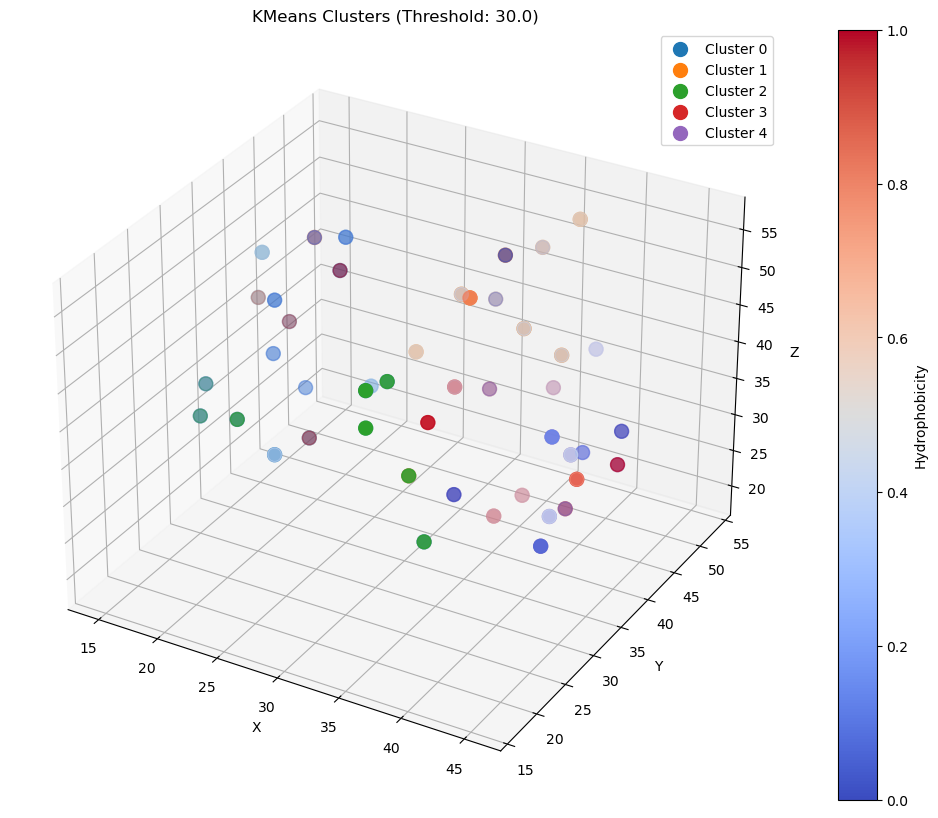

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting
from Bio.PDB import PDBParser

# Input PDB file path
pdb_file = "/home/hp/nayanika/github/GPX6/prep_structures/original_mousecys.pdb"

# Residue mapping table (Position, Human Cys, Mouse Cys)
selected_residues = [
    (3, 'N', 'K'), (4, 'R', 'S'), (16, 'I', 'V'), (22, 'L', 'N'), (24, 'L', 'I'),
    (25, 'N', 'D'), (27, 'E', 'G'), (29, 'Y', 'F'), (30, 'I', 'V'), (31, 'Q', 'N'),
    (33, 'K', 'Q'), (35, 'F', 'Y'), (40, 'V', 'I'), (47, 'A', 'S'), (48, 'Y', 'F'),
    (52, 'A', 'T'), (54, 'Q', 'T'), (60, 'A', 'T'), (67, 'N', 'P'), (69, 'G', 'N'),
    (71, 'I', 'T'), (74, 'A', 'G'), (87, 'T', 'K'), (99, 'C', 'R'), (102, 'S', 'G'),
    (104, 'F', 'Y'), (107, 'S', 'N'), (119, 'E', 'D'), (120, 'K', 'N'), (126, 'T', 'S'),
    (137, 'D', 'E'), (139, 'L', 'F'), (142, 'S', 'P'), (143, 'S', 'E'), (144, 'Q', 'H'),
    (148, 'E', 'D'), (173, 'H', 'R'), (177, 'Q', 'H'), (178, 'A', 'T'), (181, 'S', 'R'),
    (182, 'T', 'I'), (184, 'K', 'Q'), (188, 'L', 'M'), (192, 'K', 'N'), (194, 'F', 'T'),
    (195, 'N', 'S')
]

# Load PDB file
parser = PDBParser(QUIET=True)
structure = parser.get_structure("protein", pdb_file)

# Get residue features
chain_id = 'X'
features = []
labels = []

for pos, human_res, mouse_res in selected_residues:
    try:
        residue = structure[0][chain_id][pos]
        ca_coord = residue['CA'].coord  # CA atom coordinates (x, y, z)
    except KeyError:
        continue

    features.append((pos, ca_coord))
    labels.append(f"{pos}-{mouse_res}")

# Process features
positions = np.array([f[0] for f in features])
coords = np.array([f[1] for f in features])

# Compute distance matrix
distance_matrix = squareform(pdist(coords))

# Hydrophobicity scale (normalized values from Kyte-Doolittle)
hydrophobicity_scale = {
    'A': 1.8, 'R': -4.5, 'N': -3.5, 'D': -3.5, 'C': 2.5, 'Q': -3.5, 'E': -3.5,
    'G': -0.4, 'H': -3.2, 'I': 4.5, 'L': 3.8, 'K': -3.9, 'M': 1.9, 'F': 2.8,
    'P': -1.6, 'S': -0.8, 'T': -0.7, 'W': -0.9, 'Y': -1.3, 'V': 4.2
}

# Map the hydrophobicity values to the residues
hydrophobicity_values = np.array([hydrophobicity_scale[mouse_res] for _, _, mouse_res in selected_residues])

# Normalize the feature values for color mapping, handling NaN values
def normalize_feature_values(values):
    values = np.array(values, dtype=float)
    valid_values = values[~np.isnan(values)] 
    if len(valid_values) > 0:
        return (values - np.nanmin(valid_values)) / (np.nanmax(valid_values) - np.nanmin(valid_values))
    else:
        return values

hydrophobicity_normalized = normalize_feature_values(hydrophobicity_values)

# Function to perform dynamic clustering based on threshold
def dynamic_clustering(distance_matrix, threshold, n_clusters=5):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(distance_matrix)
    kmeans_labels = kmeans.labels_

    cluster_members = {i: [] for i in np.unique(kmeans_labels)}
    for idx, cluster in enumerate(kmeans_labels):
        cluster_members[cluster].append(idx)

    # Filter clusters based on the threshold
    good_clusters = []
    for cluster, members in cluster_members.items():
        intra_distances = distance_matrix[np.ix_(members, members)]
        max_intra_distance = np.max(intra_distances)
        if max_intra_distance <= threshold:
            good_clusters.append((cluster, members))

    return good_clusters, kmeans_labels

# Set an initial threshold and perform dynamic clustering
threshold = 30.0
good_clusters, kmeans_labels = dynamic_clustering(distance_matrix, threshold)

# Print out cluster information
print(f"Good Clusters (Threshold: {threshold}):")
for cluster, members in good_clusters:
    print(f"Cluster {cluster}: {[labels[i] for i in members]}")

# Visualize KMeans clustering with 3D plot based on x, y, z coordinates
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot good clusters in 3D, color-coded by hydrophobicity
sc = ax.scatter(
    coords[:, 0], 
    coords[:, 1], 
    coords[:, 2], 
    c=hydrophobicity_normalized,  # Color by hydrophobicity
    cmap='coolwarm', 
    s=100
)

# Add color bar
plt.colorbar(sc, label="Hydrophobicity")

# Mark clusters
for cluster, members in good_clusters:
    ax.scatter(coords[members, 0], coords[members, 1], coords[members, 2], 
               s=100, label=f'Cluster {cluster}')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(f'KMeans Clusters (Threshold: {threshold})')

plt.legend()
plt.show()


Clusters formed with greedy algorithm (Distance: 10.0, Hydrophobicity: 0.2, Energy: 0.5):
Cluster 1: ['3-K']
Cluster 2: ['4-S', '178-T']
Cluster 3: ['16-V']
Cluster 4: ['22-N', '31-N']
Cluster 5: ['24-I', '29-F']
Cluster 6: ['25-D']
Cluster 7: ['27-G']
Cluster 8: ['30-V']
Cluster 9: ['33-Q']
Cluster 10: ['35-Y']
Cluster 11: ['40-I']
Cluster 12: ['47-S', '52-T']
Cluster 13: ['48-F']
Cluster 14: ['54-T', '60-T']
Cluster 15: ['67-P']
Cluster 16: ['69-N']
Cluster 17: ['71-T']
Cluster 18: ['74-G']
Cluster 19: ['87-K']
Cluster 20: ['99-R']
Cluster 21: ['102-G']
Cluster 22: ['104-Y']
Cluster 23: ['107-N']
Cluster 24: ['119-D', '120-N']
Cluster 25: ['126-S']
Cluster 26: ['137-E']
Cluster 27: ['139-F']
Cluster 28: ['142-P']
Cluster 29: ['143-E']
Cluster 30: ['144-H']
Cluster 31: ['148-D']
Cluster 32: ['173-R']
Cluster 33: ['177-H']
Cluster 34: ['181-R', '184-Q']
Cluster 35: ['182-I']
Cluster 36: ['188-M']
Cluster 37: ['192-N']
Cluster 38: ['194-T', '195-S']


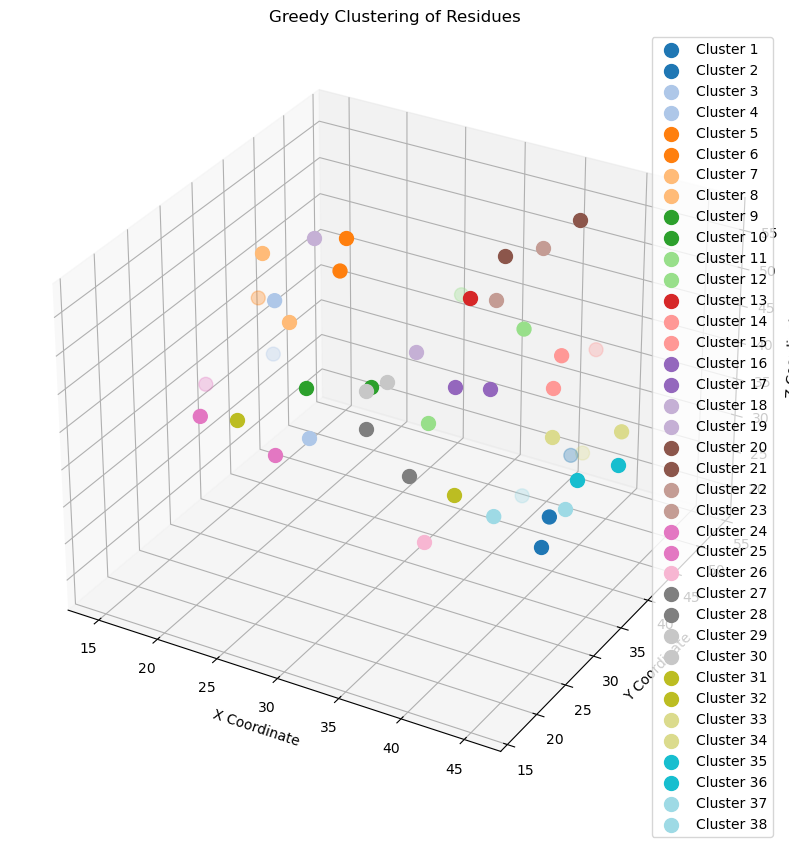

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from Bio.PDB import PDBParser

# Input PDB file path
pdb_file = "/home/hp/nayanika/github/GPX6/prep_structures/original_mousecys.pdb"

# Residue mapping table (Position, Human Cys, Mouse Cys)
selected_residues = [
    (3, 'N', 'K'), (4, 'R', 'S'), (16, 'I', 'V'), (22, 'L', 'N'), (24, 'L', 'I'),
    (25, 'N', 'D'), (27, 'E', 'G'), (29, 'Y', 'F'), (30, 'I', 'V'), (31, 'Q', 'N'),
    (33, 'K', 'Q'), (35, 'F', 'Y'), (40, 'V', 'I'), (47, 'A', 'S'), (48, 'Y', 'F'),
    (52, 'A', 'T'), (54, 'Q', 'T'), (60, 'A', 'T'), (67, 'N', 'P'), (69, 'G', 'N'),
    (71, 'I', 'T'), (74, 'A', 'G'), (87, 'T', 'K'), (99, 'C', 'R'), (102, 'S', 'G'),
    (104, 'F', 'Y'), (107, 'S', 'N'), (119, 'E', 'D'), (120, 'K', 'N'), (126, 'T', 'S'),
    (137, 'D', 'E'), (139, 'L', 'F'), (142, 'S', 'P'), (143, 'S', 'E'), (144, 'Q', 'H'),
    (148, 'E', 'D'), (173, 'H', 'R'), (177, 'Q', 'H'), (178, 'A', 'T'), (181, 'S', 'R'),
    (182, 'T', 'I'), (184, 'K', 'Q'), (188, 'L', 'M'), (192, 'K', 'N'), (194, 'F', 'T'),
    (195, 'N', 'S')
]

# Free energy values (some might be missing)
free_energy_dict = {
    3: 24.64, 4: 22.52, 16: None, 22: 12.68, 24: 17.85, 25: None, 27: None,
    29: 15.04, 30: 20.93, 31: 20.22, 33: 30.57, 35: None, 40: None, 47: 17.38,
    48: 20.25, 52: 20.08, 54: 20.30, 60: 23.91, 67: 21.87, 69: 20.83, 71: 20.55,
    74: 20.78, 87: None, 99: 17.74, 102: None, 104: None, 107: 19.84, 119: 19.93,
    120: 19.48, 126: 19.06, 137: 20.45, 139: None, 142: None, 143: None, 144: 22.42,
    148: None, 173: 17.98, 177: 21.33, 178: 21.87, 181: 24.20, 182: 21.07, 184: 21.30,
    188: 18.76, 192: 18.67, 194: 21.00, 195: 21.31
}

# Load PDB file
parser = PDBParser(QUIET=True)
structure = parser.get_structure("protein", pdb_file)

# Get residue features
chain_id = 'X'
features = []
labels = []

for pos, human_res, mouse_res in selected_residues:
    try:
        residue = structure[0][chain_id][pos]
        ca_coord = residue['CA'].coord  # CA atom coordinates (x, y, z)
    except KeyError:
        continue

    features.append((pos, ca_coord))
    labels.append(f"{pos}-{mouse_res}")

# Process features
positions = np.array([f[0] for f in features])
coords = np.array([f[1] for f in features])

# Compute distance matrix
distance_matrix = squareform(pdist(coords))

# Hydrophobicity scale (normalized values from Kyte-Doolittle)
hydrophobicity_scale = {
    'A': 1.8, 'R': -4.5, 'N': -3.5, 'D': -3.5, 'C': 2.5, 'Q': -3.5, 'E': -3.5,
    'G': -0.4, 'H': -3.2, 'I': 4.5, 'L': 3.8, 'K': -3.9, 'M': 1.9, 'F': 2.8,
    'P': -1.6, 'S': -0.8, 'T': -0.7, 'W': -0.9, 'Y': -1.3, 'V': 4.2
}

# Map the hydrophobicity values to the residues
hydrophobicity_values = np.array([hydrophobicity_scale[mouse_res] for _, _, mouse_res in selected_residues])

# Normalize feature values
def normalize(values):
    values = np.array([float(v) if v is not None else np.nan for v in values])
    valid = ~np.isnan(values)
    values[valid] = (values[valid] - np.min(values[valid])) / (np.max(values[valid]) - np.min(values[valid]))
    return values

hydrophobicity_normalized = normalize(hydrophobicity_values)
free_energy_values = [free_energy_dict.get(pos, None) for pos, _, _ in selected_residues]
free_energy_normalized = normalize(free_energy_values)

# Greedy clustering algorithm
def greedy_clustering(coords, hydrophobicity, free_energy, dist_threshold=10.0, hydro_threshold=0.2, energy_threshold=0.5):
    n = len(coords)
    clustered = [False] * n
    clusters = []

    for i in range(n):
        if not clustered[i]:  # If residue is not yet part of a cluster
            cluster = [i]  # Start a new cluster
            clustered[i] = True

            # Check other residues for inclusion in the current cluster
            for j in range(n):
                if not clustered[j]:
                    distance = np.linalg.norm(coords[i] - coords[j])
                    hydro_diff = abs(hydrophobicity[i] - hydrophobicity[j])
                    energy_diff = abs(free_energy[i] - free_energy[j]) if free_energy[i] is not None and free_energy[j] is not None else float('inf')

                    if distance < dist_threshold and hydro_diff < hydro_threshold and energy_diff < energy_threshold:
                        cluster.append(j)
                        clustered[j] = True

            clusters.append(cluster)

    return clusters

# Perform greedy clustering
dist_threshold = 10.0
hydro_threshold = 0.2
energy_threshold = 0.5
clusters = greedy_clustering(coords, hydrophobicity_normalized, free_energy_normalized, dist_threshold, hydro_threshold, energy_threshold)

# Print out cluster information
print(f"Clusters formed with greedy algorithm (Distance: {dist_threshold}, Hydrophobicity: {hydro_threshold}, Energy: {energy_threshold}):")
for idx, cluster in enumerate(clusters):
    print(f"Cluster {idx + 1}: {[labels[i] for i in cluster]}")

# Visualize clusters in 3D
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

colors = plt.cm.tab20(np.linspace(0, 1, len(clusters)))

for idx, cluster in enumerate(clusters):
    cluster_coords = coords[cluster]
    ax.scatter(
        cluster_coords[:, 0], cluster_coords[:, 1], cluster_coords[:, 2],
        color=colors[idx], s=100, label=f"Cluster {idx + 1}"
    )

# Set axis labels and title
ax.set_xlabel("X Coordinate")
ax.set_ylabel("Y Coordinate")
ax.set_zlabel("Z Coordinate")
ax.set_title("Greedy Clustering of Residues")

plt.legend()
plt.show()


Clusters formed with greedy algorithm:
Cluster 1: ['3-K']
Cluster 2: ['4-S', '177-H', '178-T', '182-I']
Cluster 3: ['16-V']
Cluster 4: ['22-N']
Cluster 5: ['24-I']
Cluster 6: ['25-D']
Cluster 7: ['27-G']
Cluster 8: ['29-F']
Cluster 9: ['30-V', '31-N']
Cluster 10: ['33-Q']
Cluster 11: ['35-Y']
Cluster 12: ['40-I']
Cluster 13: ['47-S', '99-R']
Cluster 14: ['48-F', '52-T']
Cluster 15: ['54-T']
Cluster 16: ['60-T', '181-R']
Cluster 17: ['67-P', '69-N']
Cluster 18: ['71-T']
Cluster 19: ['74-G']
Cluster 20: ['87-K']
Cluster 21: ['102-G']
Cluster 22: ['104-Y']
Cluster 23: ['107-N']
Cluster 24: ['119-D', '120-N', '126-S']
Cluster 25: ['137-E']
Cluster 26: ['139-F']
Cluster 27: ['142-P']
Cluster 28: ['143-E']
Cluster 29: ['144-H']
Cluster 30: ['148-D']
Cluster 31: ['173-R']
Cluster 32: ['184-Q']
Cluster 33: ['188-M', '192-N']
Cluster 34: ['194-T', '195-S']


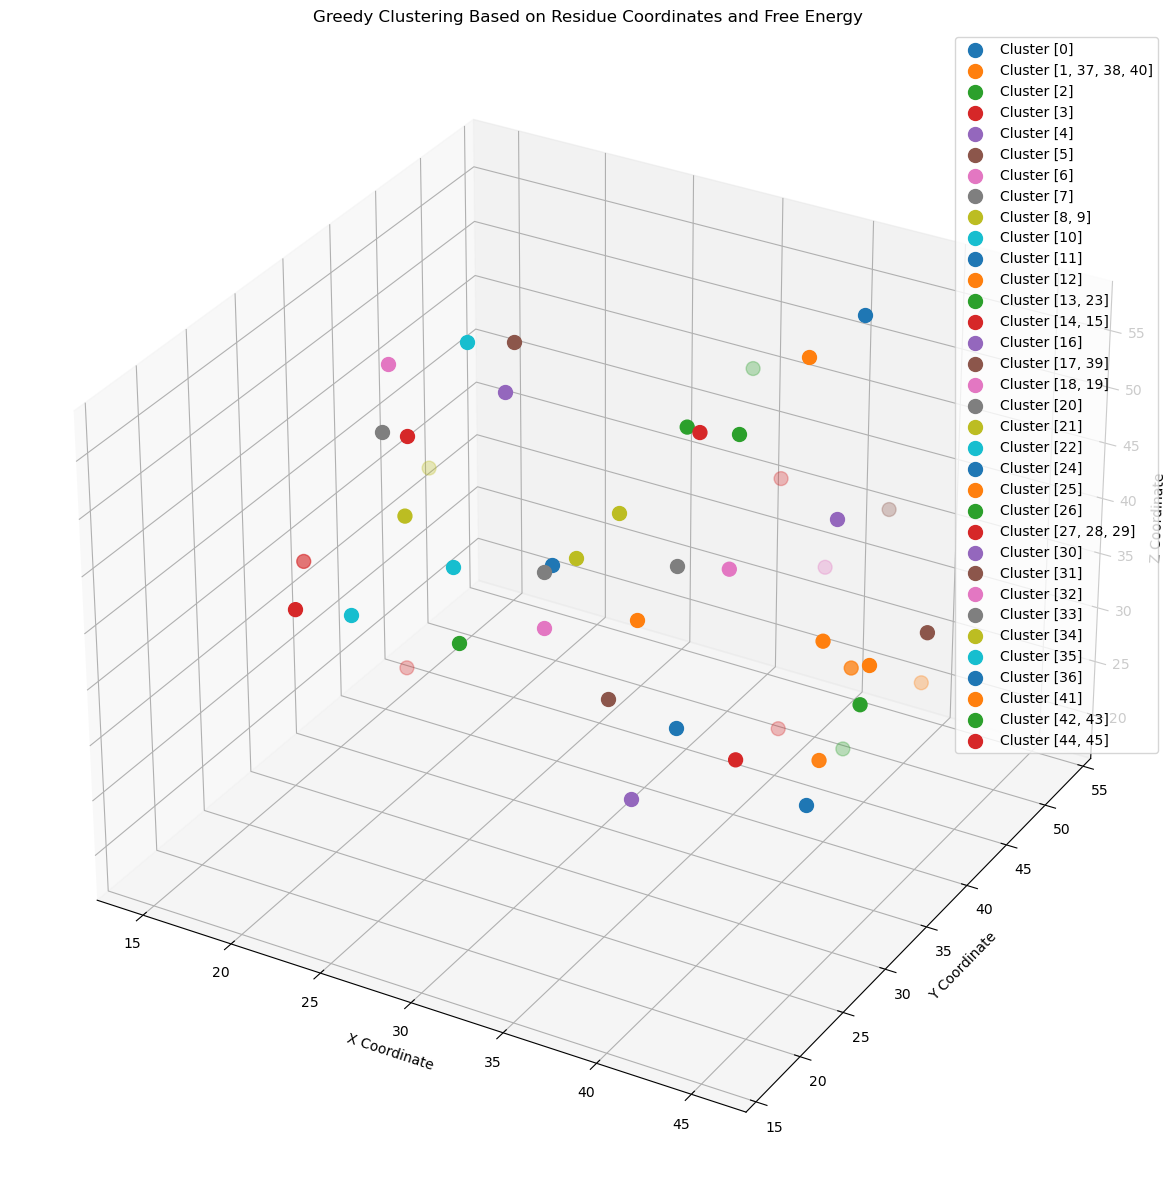

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import MinMaxScaler
from Bio.PDB import PDBParser

# Input PDB file path
pdb_file = "/home/hp/nayanika/github/GPX6/prep_structures/original_mousecys.pdb"

# Residue mapping table (Position, Human Cys, Mouse Cys)
selected_residues = [
    (3, 'N', 'K'), (4, 'R', 'S'), (16, 'I', 'V'), (22, 'L', 'N'), (24, 'L', 'I'),
    (25, 'N', 'D'), (27, 'E', 'G'), (29, 'Y', 'F'), (30, 'I', 'V'), (31, 'Q', 'N'),
    (33, 'K', 'Q'), (35, 'F', 'Y'), (40, 'V', 'I'), (47, 'A', 'S'), (48, 'Y', 'F'),
    (52, 'A', 'T'), (54, 'Q', 'T'), (60, 'A', 'T'), (67, 'N', 'P'), (69, 'G', 'N'),
    (71, 'I', 'T'), (74, 'A', 'G'), (87, 'T', 'K'), (99, 'C', 'R'), (102, 'S', 'G'),
    (104, 'F', 'Y'), (107, 'S', 'N'), (119, 'E', 'D'), (120, 'K', 'N'), (126, 'T', 'S'),
    (137, 'D', 'E'), (139, 'L', 'F'), (142, 'S', 'P'), (143, 'S', 'E'), (144, 'Q', 'H'),
    (148, 'E', 'D'), (173, 'H', 'R'), (177, 'Q', 'H'), (178, 'A', 'T'), (181, 'S', 'R'),
    (182, 'T', 'I'), (184, 'K', 'Q'), (188, 'L', 'M'), (192, 'K', 'N'), (194, 'F', 'T'),
    (195, 'N', 'S')
]

# Free energy data (as provided)
free_energy_dict = {
    3: 24.64, 4: 22.52, 16: None, 22: 12.68, 24: 17.85, 25: None, 27: None,
    29: 15.04, 30: 20.93, 31: 20.22, 33: 30.57, 35: None, 40: None, 47: 17.38,
    48: 20.25, 52: 20.08, 54: 20.30, 60: 23.91, 67: 21.87, 69: 20.83, 71: 20.55,
    74: 20.78, 87: None, 99: 17.74, 102: None, 104: None, 107: 19.84, 119: 19.93,
    120: 19.48, 126: 19.06, 137: 20.45, 139: None, 142: None, 143: None, 144: 22.42,
    148: None, 173: 17.98, 177: 21.33, 178: 21.87, 181: 24.20, 182: 21.07, 184: 21.30,
    188: 18.76, 192: 18.67, 194: 21.00, 195: 21.31
}

# Load PDB file
parser = PDBParser(QUIET=True)
structure = parser.get_structure("protein", pdb_file)

# Get residue features (coordinates and labels)
chain_id = 'X'
features = []
labels = []

for pos, human_res, mouse_res in selected_residues:
    try:
        residue = structure[0][chain_id][pos]
        ca_coord = residue['CA'].coord
    except KeyError:
        continue

    features.append((pos, ca_coord))
    labels.append(f"{pos}-{mouse_res}")

# Process features (coords and free energy)
positions = np.array([f[0] for f in features])
coords = np.array([f[1] for f in features])

# Convert None to np.nan for free energy and then normalize
free_energies = np.array([free_energy_dict.get(pos, np.nan) for pos in positions])

# Ensure free_energies is of type float for np.isnan to work
free_energies = free_energies.astype(float)

# Normalize free energy values for clustering (ignoring np.nan values)
scaler = MinMaxScaler()
valid_energies = free_energies[~np.isnan(free_energies)].reshape(-1, 1)
scaler.fit(valid_energies)
free_energy_normalized = np.where(np.isnan(free_energies), np.nan, scaler.transform(free_energies.reshape(-1, 1)).flatten())

# Greedy clustering function
def greedy_clustering(coords, free_energies, max_cluster_distance=10.0):
    n = len(coords)
    clustered = [False] * n
    clusters = []

    for i in range(n):
        if not clustered[i]:  # If the residue is not yet part of a cluster
            cluster = [i]  # Start a new cluster with the current residue
            clustered[i] = True
            
            # Compare with all other residues
            for j in range(n):
                if not clustered[j]:
                    # Calculate distance between residue i and residue j
                    distance = np.linalg.norm(coords[i] - coords[j])
                    
                    # Check if they are close enough and if their free energies are similar
                    if distance < max_cluster_distance and abs(free_energy_normalized[i] - free_energy_normalized[j]) < 0.1:
                        cluster.append(j)
                        clustered[j] = True
            clusters.append(cluster)
    
    return clusters

# Perform greedy clustering
clusters = greedy_clustering(coords, free_energy_normalized)

# Print out the clusters
print(f"Clusters formed with greedy algorithm:")
for idx, cluster in enumerate(clusters):
    print(f"Cluster {idx + 1}: {[labels[i] for i in cluster]}")

# Visualize the clusters in 3D (using the original coordinates)
fig = plt.figure(figsize=(25, 15))
ax = fig.add_subplot(111, projection='3d')

# Color the residues by free energy
for cluster in clusters:
    cluster_coords = coords[cluster]
    ax.scatter(cluster_coords[:, 0], cluster_coords[:, 1], cluster_coords[:, 2], s=100, label=f'Cluster {cluster}')

# Set axis labels and title
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Z Coordinate')
ax.set_title('Greedy Clustering Based on Residue Coordinates and Free Energy')

# Show the legend
plt.legend()
plt.show()


/home/hp/anaconda3/envs/openMM/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/tmp/ipykernel_50503/1467637871.py:95: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label="Hydrophobicity")


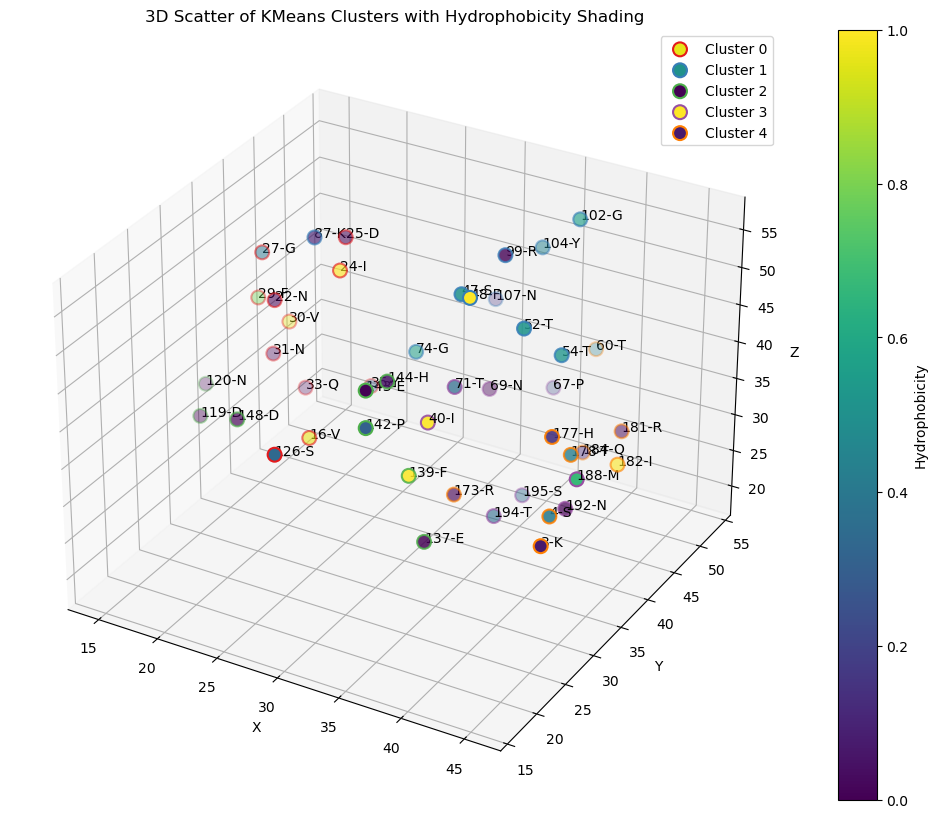

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans
from Bio.PDB import PDBParser

# Input PDB file path
pdb_file = "/home/hp/nayanika/github/GPX6/prep_structures/original_mousecys.pdb"

# Residue mapping table (Position, Human Cys, Mouse Cys)
selected_residues = [
    (3, 'N', 'K'), (4, 'R', 'S'), (16, 'I', 'V'), (22, 'L', 'N'), (24, 'L', 'I'),
    (25, 'N', 'D'), (27, 'E', 'G'), (29, 'Y', 'F'), (30, 'I', 'V'), (31, 'Q', 'N'),
    (33, 'K', 'Q'), (35, 'F', 'Y'), (40, 'V', 'I'), (47, 'A', 'S'), (48, 'Y', 'F'),
    (52, 'A', 'T'), (54, 'Q', 'T'), (60, 'A', 'T'), (67, 'N', 'P'), (69, 'G', 'N'),
    (71, 'I', 'T'), (74, 'A', 'G'), (87, 'T', 'K'), (99, 'C', 'R'), (102, 'S', 'G'),
    (104, 'F', 'Y'), (107, 'S', 'N'), (119, 'E', 'D'), (120, 'K', 'N'), (126, 'T', 'S'),
    (137, 'D', 'E'), (139, 'L', 'F'), (142, 'S', 'P'), (143, 'S', 'E'), (144, 'Q', 'H'),
    (148, 'E', 'D'), (173, 'H', 'R'), (177, 'Q', 'H'), (178, 'A', 'T'), (181, 'S', 'R'),
    (182, 'T', 'I'), (184, 'K', 'Q'), (188, 'L', 'M'), (192, 'K', 'N'), (194, 'F', 'T'),
    (195, 'N', 'S')
]

# Hydrophobicity scale (normalized values from Kyte-Doolittle)
hydrophobicity_scale = {
    'A': 1.8, 'R': -4.5, 'N': -3.5, 'D': -3.5, 'C': 2.5, 'Q': -3.5, 'E': -3.5,
    'G': -0.4, 'H': -3.2, 'I': 4.5, 'L': 3.8, 'K': -3.9, 'M': 1.9, 'F': 2.8,
    'P': -1.6, 'S': -0.8, 'T': -0.7, 'W': -0.9, 'Y': -1.3, 'V': 4.2
}

# Load PDB file
parser = PDBParser(QUIET=True)
structure = parser.get_structure("protein", pdb_file)

# Extract residue features
chain_id = 'X'
features = []
labels = []

for pos, human_res, mouse_res in selected_residues:
    try:
        residue = structure[0][chain_id][pos]
        ca_coord = residue['CA'].coord
    except KeyError:
        continue

    features.append((pos, ca_coord))
    labels.append(f"{pos}-{mouse_res}")

# Process features
positions = np.array([f[0] for f in features])
coords = np.array([f[1] for f in features])

# Compute distance matrix
distance_matrix = squareform(pdist(coords))

# Perform KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(distance_matrix)
kmeans_labels = kmeans.labels_

# Hydrophobicity and free energy
hydrophobicity_values = np.array([hydrophobicity_scale[mouse_res] for _, _, mouse_res in selected_residues])
hydrophobicity_normalized = (hydrophobicity_values - np.min(hydrophobicity_values)) / (
    np.max(hydrophobicity_values) - np.min(hydrophobicity_values)
)

# Assign unique colors for clusters
cluster_colors = sns.color_palette("Set1", n_colors=len(np.unique(kmeans_labels)))

# Visualize KMeans clustering with 3D scatter plot
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot each cluster with a distinct cluster color and feature-based shading
for cluster in np.unique(kmeans_labels):
    cluster_indices = np.where(kmeans_labels == cluster)[0]
    cluster_points = coords[cluster_indices]

    ax.scatter(
        cluster_points[:, 0],
        cluster_points[:, 1],
        cluster_points[:, 2],
        c=hydrophobicity_normalized[cluster_indices],  # Feature-based coloring
        cmap='viridis',  # Colormap for shading based on feature
        edgecolor=[cluster_colors[cluster]],  # Distinct color for each cluster
        linewidth=1.5,
        s=100,
        label=f'Cluster {cluster}'
    )

# Add a color bar for the hydrophobicity values
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=np.min(hydrophobicity_normalized), vmax=np.max(hydrophobicity_normalized)))
plt.colorbar(sm, label="Hydrophobicity")

# Add labels for points
for i, label in enumerate(labels):
    ax.text(coords[i, 0], coords[i, 1], coords[i, 2], label, size=10)

# Plot settings
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3D Scatter of KMeans Clusters with Hydrophobicity Shading')
plt.legend()
plt.show()


In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from Bio.PDB import PDBParser

# Input PDB file path
pdb_file = "/home/hp/nayanika/github/GPX6/prep_structures/original_mousecys.pdb"

# Residue mapping table (Position, Human Cys, Mouse Cys)
selected_residues = [
    (3, 'N', 'K'), (4, 'R', 'S'), (16, 'I', 'V'), (22, 'L', 'N'), (24, 'L', 'I'),
    (25, 'N', 'D'), (27, 'E', 'G'), (29, 'Y', 'F'), (30, 'I', 'V'), (31, 'Q', 'N'),
    (33, 'K', 'Q'), (35, 'F', 'Y'), (40, 'V', 'I'), (47, 'A', 'S'), (48, 'Y', 'F'),
    (52, 'A', 'T'), (54, 'Q', 'T'), (60, 'A', 'T'), (67, 'N', 'P'), (69, 'G', 'N'),
    (71, 'I', 'T'), (74, 'A', 'G'), (87, 'T', 'K'), (99, 'C', 'R'), (102, 'S', 'G'),
    (104, 'F', 'Y'), (107, 'S', 'N'), (119, 'E', 'D'), (120, 'K', 'N'), (126, 'T', 'S'),
    (137, 'D', 'E'), (139, 'L', 'F'), (142, 'S', 'P'), (143, 'S', 'E'), (144, 'Q', 'H'),
    (148, 'E', 'D'), (173, 'H', 'R'), (177, 'Q', 'H'), (178, 'A', 'T'), (181, 'S', 'R'),
    (182, 'T', 'I'), (184, 'K', 'Q'), (188, 'L', 'M'), (192, 'K', 'N'), (194, 'F', 'T'),
    (195, 'N', 'S')
]

# Load PDB file
parser = PDBParser(QUIET=True)
structure = parser.get_structure("protein", pdb_file)

# Get residue features
chain_id = 'X'
features = []
labels = []

for pos, human_res, mouse_res in selected_residues:
    try:
        residue = structure[0][chain_id][pos]
        ca_coord = residue['CA'].coord  # Alpha carbon coordinates
    except KeyError:
        continue

    features.append((pos, ca_coord))
    labels.append(f"{pos}-{mouse_res}")

# Process features
positions = np.array([f[0] for f in features])
coords = np.array([f[1] for f in features])
print(coords)


[[45.47  25.487 32.867]
 [44.477 29.162 33.605]
 [22.19  34.577 29.451]
 [17.212 38.767 43.206]
 [21.529 41.3   47.487]
 [20.533 44.283 49.651]
 [15.123 40.829 47.454]
 [14.627 40.973 41.   ]
 [16.738 42.048 37.924]
 [16.381 39.964 34.717]
 [18.289 41.616 29.744]
 [22.846 43.842 30.57 ]
 [29.497 40.09  31.228]
 [33.797 36.732 52.666]
 [35.732 34.054 54.782]
 [38.449 37.583 49.7  ]
 [40.354 40.127 45.367]
 [39.634 48.141 40.499]
 [33.923 53.335 29.058]
 [30.428 49.134 30.107]
 [29.702 44.369 33.288]
 [29.203 38.643 41.708]
 [21.993 36.236 55.275]
 [35.261 41.137 55.591]
 [37.78  48.87  56.532]
 [34.869 48.679 51.701]
 [30.861 49.119 42.701]
 [20.847 19.919 41.989]
 [19.501 23.334 43.266]
 [24.002 25.442 34.464]
 [39.99  17.637 36.471]
 [38.169 18.901 43.226]
 [35.961 16.561 49.926]
 [35.343 17.831 53.52 ]
 [35.219 21.493 52.118]
 [25.545 16.887 45.86 ]
 [36.331 30.287 31.665]
 [43.414 31.756 41.745]
 [44.066 33.698 38.333]
 [44.464 42.039 35.818]
 [45.589 38.787 34.156]
 [41.611 41.509 

/home/hp/anaconda3/envs/openMM/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[[26.60459116 23.64217335 17.20419018 18.14009044 18.18356246 19.9360358
  20.96582126 18.65585859 16.78699101 17.13541392 16.91049974 14.74432437
  13.70311498 22.85631615 25.75181303 22.07462494 19.91236291 17.8210948
  17.7890863  15.01277942 13.24964202 15.10273834 24.88151527 24.65786247
  26.71575048 22.03227595 16.28893831 28.11369031 26.11864001 22.0790449
  30.15890344 29.71010048 33.44414951 34.09999329 30.71006733 30.94493501
  19.20460352 22.84956644 21.39291781 18.8772537  20.0118919  17.07311546
  17.7671431  20.13106411 19.96593259 20.0294077 ]
 [20.48166489 19.43991282 25.43929575 24.46798173 22.62683651 24.98600786
  26.59273423 27.60023034 27.45685814 27.87572821 29.81759503 28.26433373
  23.75151246 16.27959136 16.33344034 16.13709885 17.66792871 24.16274413
  32.63814167 29.47671931 24.88043208 18.48537006 21.46639177 19.33198726
  25.05346433 23.59372937 24.63574046 20.34873748 20.19590404 20.34297777
  19.35097256 16.44588176 17.59296094 18.01230138 15.993413   18

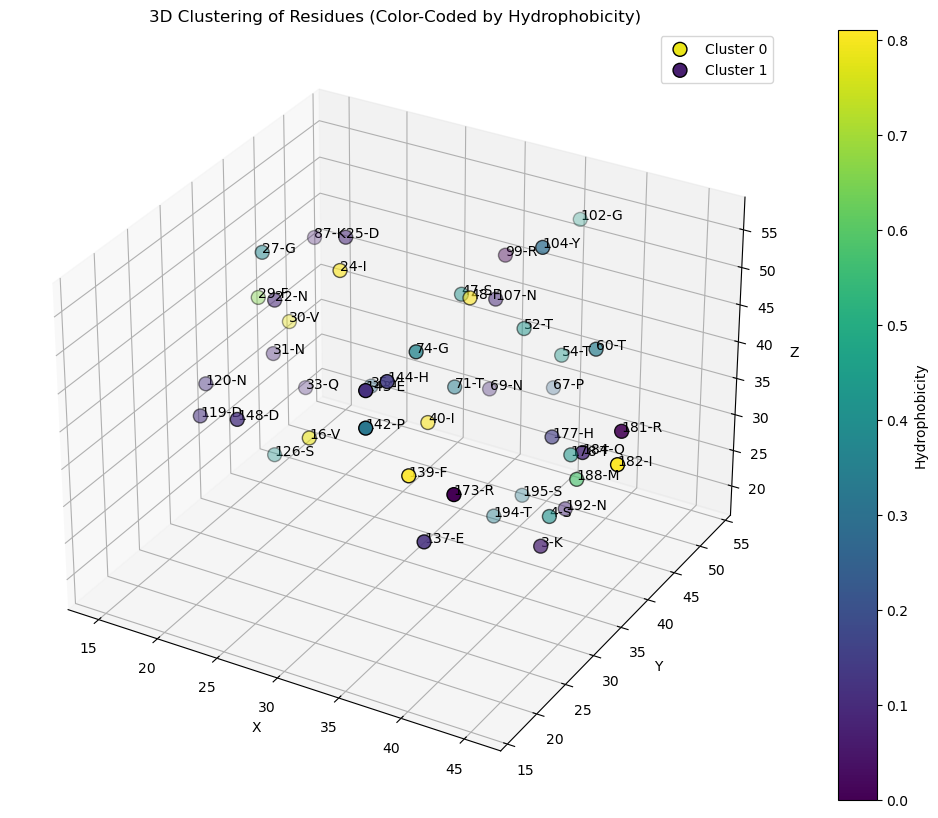


Cluster 0:
  Position: 16, Residue: V
  Position: 22, Residue: N
  Position: 24, Residue: I
  Position: 25, Residue: D
  Position: 27, Residue: G
  Position: 29, Residue: F
  Position: 30, Residue: V
  Position: 31, Residue: N
  Position: 33, Residue: Q
  Position: 35, Residue: Y
  Position: 40, Residue: I
  Position: 60, Residue: T
  Position: 67, Residue: P
  Position: 69, Residue: N
  Position: 71, Residue: T
  Position: 74, Residue: G
  Position: 104, Residue: Y
  Position: 107, Residue: N
  Position: 173, Residue: R
  Position: 181, Residue: R
  Position: 182, Residue: I
  Position: 184, Residue: Q
  Position: 188, Residue: M
  Position: 192, Residue: N
  Position: 194, Residue: T
  Position: 195, Residue: S

Cluster 1:
  Position: 3, Residue: K
  Position: 4, Residue: S
  Position: 47, Residue: S
  Position: 48, Residue: F
  Position: 52, Residue: T
  Position: 54, Residue: T
  Position: 87, Residue: K
  Position: 99, Residue: R
  Position: 102, Residue: G
  Position: 119, Resid

/home/hp/anaconda3/envs/openMM/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/hp/anaconda3/envs/openMM/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/hp/anaconda3/envs/openMM/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/hp/anaconda3/envs/openMM/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of

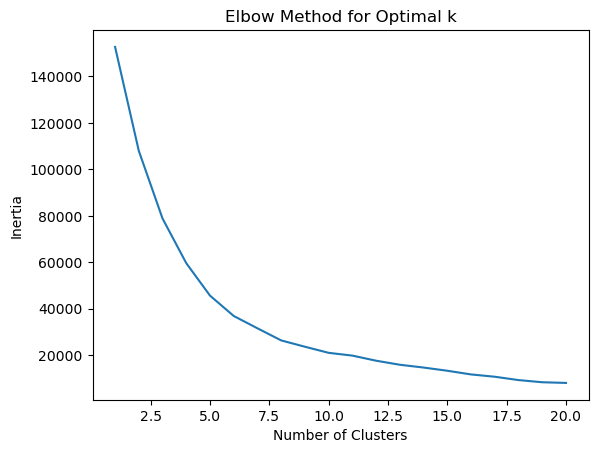

Silhouette Score: 0.2541954056094399
Figure saved to /home/hp/nayanika/github/GPX6/figures/3d_clustering_residues.png


In [9]:
# Compute distance matrix
distance_matrix = squareform(pdist(coords))

# Normalize the features for uniformity (scaling all features)
scaler = StandardScaler()
normalized_coords = scaler.fit_transform(coords)  # Scale the coordinates for uniformity

# Perform KMeans clustering with optimal number of clusters (to be determined)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(distance_matrix)
kmeans_labels = kmeans.labels_
centroids  = kmeans.cluster_centers_
print(centroids)


# Hydrophobicity scale (normalized values from Kyte-Doolittle)
hydrophobicity_scale = {
    'A': 1.8, 'R': -4.5, 'N': -3.5, 'D': -3.5, 'C': 2.5, 'Q': -3.5, 'E': -3.5,
    'G': -0.4, 'H': -3.2, 'I': 4.5, 'L': 3.8, 'K': -3.9, 'M': 1.9, 'F': 2.8,
    'P': -1.6, 'S': -0.8, 'T': -0.7, 'W': -0.9, 'Y': -1.3, 'V': 4.2
}

# Map the hydrophobicity values to the residues
hydrophobicity_values = np.array([hydrophobicity_scale[mouse_res] for _, _, mouse_res in selected_residues])

# Free energy values (some might be missing)
free_energy_dict = {
    3: 24.64, 4: 22.52, 16: 14.34, 22: 12.68, 24: 17.85, 25: 17.89, 27: 15.8,
    29: 15.04, 30: 20.93, 31: 20.22, 33: 30.57, 35: 20.39, 40: 23.14, 47: 17.38,
    48: 20.25, 52: 20.08, 54: 20.30, 60: 23.91, 67: 21.87, 69: 20.83, 71: 20.55,
    74: 20.78, 87: 18.9, 99: 17.74, 102: 17.9, 104: 18.4, 107: 19.84, 119: 19.93,
    120: 19.48, 126: 19.06, 137: 20.45, 139: 17.5, 142: 17.45, 143: 18.09, 144: 22.42,
    148: 15.3, 173: 17.98, 177: 21.33, 178: 21.87, 181: 24.20, 182: 21.07, 184: 21.30,
    188: 18.76, 192: 18.67, 194: 21.00, 195: 21.31
}

# Replace None with NaN for free energy values
free_energy_values = np.array([free_energy_dict.get(pos, np.nan) for pos, _, _ in selected_residues])

# Normalize the feature values for color mapping, handling NaN values
def normalize_feature_values(values):
    values = np.array(values, dtype=float)  # Convert to float
    valid_values = values[~np.isnan(values)]  # Extract valid values

    if len(valid_values) > 0:
        return (values - np.nanmin(valid_values)) / (np.nanmax(valid_values) - np.nanmin(valid_values))
    else:
        return values

hydrophobicity_normalized = normalize_feature_values(hydrophobicity_values)
free_energy_normalized = normalize_feature_values(free_energy_values)

# Select feature for color coding
color_by = 'hydrophobicity'  # Options: 'hydrophobicity', 'free_energy'

if color_by == 'hydrophobicity':
    feature_colors = hydrophobicity_normalized
    color_label = "Hydrophobicity"
elif color_by == 'free_energy':
    feature_colors = free_energy_normalized
    color_label = "Free Energy"

# Visualize KMeans clustering with 3D scatter plot, color-coded by selected feature
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# Define a color map for clusters (using Set1 color palette for distinct colors)
cluster_colors = sns.color_palette("Set1", n_colors=10)

# Plot clusters in 3D, color-coded by the selected feature
for cluster in np.unique(kmeans_labels):
    cluster_indices = np.where(kmeans_labels == cluster)[0]
    cluster_points = coords[cluster_indices]
    
    # Plot cluster points with the color based on feature
    sc = ax.scatter(
        cluster_points[:, 0], 
        cluster_points[:, 1], 
        cluster_points[:, 2], 
        c=feature_colors[cluster_indices], 
        cmap='viridis', 
        s=100, 
        label=f'Cluster {cluster}',
        edgecolors='k'  # Add black edge color for clarity
    )

# Add color bar for the feature values
plt.colorbar(sc, label=color_label)

# Add labels for points
for i, label in enumerate(labels):
    ax.text(x_coords[i], y_coords[i], z_coords[i], label, size=10)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title(f'3D Clustering of Residues (Color-Coded by {color_label})')

# Show legend for clusters
plt.legend()

# Show the plot
plt.show()

# Output the clusters with their residues
cluster_data = {i: [] for i in np.unique(kmeans_labels)}

for idx, label in enumerate(kmeans_labels):
    cluster_data[label].append((positions[idx], selected_residues[idx][2]))  # (Position, Residue)

# Print the cluster details
for cluster_id, residues in cluster_data.items():
    print(f"\nCluster {cluster_id}:")
    for pos, res in residues:
        print(f"  Position: {pos}, Residue: {res}")

# Elbow Method for optimal k
inertia = []
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(distance_matrix)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 21), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Silhouette Score
silhouette_avg = silhouette_score(distance_matrix, kmeans_labels)
print(f"Silhouette Score: {silhouette_avg}")
output_path = "/home/hp/nayanika/github/GPX6/figures/3d_clustering_residues.png"
fig.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"Figure saved to {output_path}")

In [ ]:
# Hydrophobicity scale (normalized values from Kyte-Doolittle)
hydrophobicity_scale = {
    'A': 1.8, 'R': -4.5, 'N': -3.5, 'D': -3.5, 'C': 2.5, 'Q': -3.5, 'E': -3.5,
    'G': -0.4, 'H': -3.2, 'I': 4.5, 'L': 3.8, 'K': -3.9, 'M': 1.9, 'F': 2.8,
    'P': -1.6, 'S': -0.8, 'T': -0.7, 'W': -0.9, 'Y': -1.3, 'V': 4.2
}

# Map the hydrophobicity values to the residues
hydrophobicity_values = np.array([hydrophobicity_scale[mouse_res] for _, _, mouse_res in selected_residues])

# Free energy values (some might be missing)
free_energy_dict = {
    3: 24.64, 4: 22.52, 16: 14.34, 22: 12.68, 24: 17.85, 25: 17.89, 27: 15.8,
    29: 15.04, 30: 20.93, 31: 20.22, 33: 30.57, 35: 20.39, 40: 23.14, 47: 17.38,
    48: 20.25, 52: 20.08, 54: 20.30, 60: 23.91, 67: 21.87, 69: 20.83, 71: 20.55,
    74: 20.78, 87: 18.9, 99: 17.74, 102: 17.9, 104: 18.4, 107: 19.84, 119: 19.93,
    120: 19.48, 126: 19.06, 137: 20.45, 139: 17.5, 142: 17.45, 143: 18.09, 144: 22.42,
    148: 15.3, 173: 17.98, 177: 21.33, 178: 21.87, 181: 24.20, 182: 21.07, 184: 21.30,
    188: 18.76, 192: 18.67, 194: 21.00, 195: 21.31
}

# Replace None with NaN for free energy values
free_energy_values = np.array([free_energy_dict.get(pos, np.nan) for pos, _, _ in selected_residues])

# Normalize the feature values for color mapping, handling NaN values
def normalize_feature_values(values):
    values = np.array(values, dtype=float)  # Convert to float
    valid_values = values[~np.isnan(values)]  # Extract valid values

    if len(valid_values) > 0:
        return (values - np.nanmin(valid_values)) / (np.nanmax(valid_values) - np.nanmin(valid_values))
    else:
        return values

hydrophobicity_normalized = normalize_feature_values(hydrophobicity_values)
free_energy_normalized = normalize_feature_values(free_energy_values)

# Select feature for color coding
color_by = 'hydrophobicity'  # Options: 'hydrophobicity', 'free_energy'

if color_by == 'hydrophobicity':
    feature_colors = hydrophobicity_normalized
    color_label = "Hydrophobicity"
elif color_by == 'free_energy':
    feature_colors = free_energy_normalized
    color_label = "Free Energy"

# Visualize KMeans clustering with 3D scatter plot, color-coded by selected feature
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# Define a color map for clusters (using Set1 color palette for distinct colors)
cluster_colors = sns.color_palette("Set1", n_colors=10)

# Plot clusters in 3D, color-coded by the selected feature
for cluster in np.unique(kmeans_labels):
    cluster_indices = np.where(kmeans_labels == cluster)[0]
    cluster_points = coords[cluster_indices]
    
    # Plot cluster points with the color based on feature
    sc = ax.scatter(
        cluster_points[:, 0], 
        cluster_points[:, 1], 
        cluster_points[:, 2], 
        c=feature_colors[cluster_indices], 
        cmap='viridis', 
        s=100, 
        label=f'Cluster {cluster}',
        edgecolors='k'  # Add black edge color for clarity
    )

# Add color bar for the feature values
plt.colorbar(sc, label=color_label)

# Add labels for points
for i, label in enumerate(labels):
    ax.text(x_coords[i], y_coords[i], z_coords[i], label, size=10)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title(f'3D Clustering of Residues (Color-Coded by {color_label})')

# Show legend for clusters
plt.legend()

# Show the plot
plt.show()

# Output the clusters with their residues
cluster_data = {i: [] for i in np.unique(kmeans_labels)}

for idx, label in enumerate(kmeans_labels):
    cluster_data[label].append((positions[idx], selected_residues[idx][2]))  # (Position, Residue)

# Print the cluster details
for cluster_id, residues in cluster_data.items():
    print(f"\nCluster {cluster_id}:")
    for pos, res in residues:
        print(f"  Position: {pos}, Residue: {res}")

# Elbow Method for optimal k
inertia = []
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(distance_matrix)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 21), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Silhouette Score
silhouette_avg = silhouette_score(distance_matrix, kmeans_labels)
print(f"Silhouette Score: {silhouette_avg}")
output_path = "/home/hp/nayanika/github/GPX6/figures/3d_clustering_residues.png"
fig.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"Figure saved to {output_path}")

/home/hp/anaconda3/envs/openMM/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Residue Coordinates and Clusters:
Residue 3: Coordinates = (21.63, 24.64), Cluster = 1
Residue 4: Coordinates = (19.64, 22.52), Cluster = 1
Residue 16: Coordinates = (27.12, 14.34), Cluster = 1
Residue 22: Coordinates = (22.91, 12.68), Cluster = 1
Residue 24: Coordinates = (18.69, 17.85), Cluster = 2
Residue 25: Coordinates = (20.70, 17.89), Cluster = 1
Residue 27: Coordinates = (24.28, 15.80), Cluster = 1
Residue 29: Coordinates = (26.66, 15.04), Cluster = 1
Residue 30: Coordinates = (26.67, 20.93), Cluster = 1
Residue 31: Coordinates = (28.12, 20.22), Cluster = 1
Residue 33: Coordinates = (30.54, 30.57), Cluster = 1
Residue 35: Coordinates = (28.03, 20.39), Cluster = 1
Residue 40: Coordinates = (23.17, 23.14), Cluster = 1
Residue 47: Coordinates = (5.59, 17.38), Cluster = 2
Residue 48: Coordinates = (3.88, 20.25), Cluster = 2
Residue 52: Coordinates = (5.20, 20.08), Cluster = 2
Residue 54: Coordinates = (10.00, 20.30), Cluster = 2
Residue 60: Coordinates = (19.05, 23.91), Cluster = 1

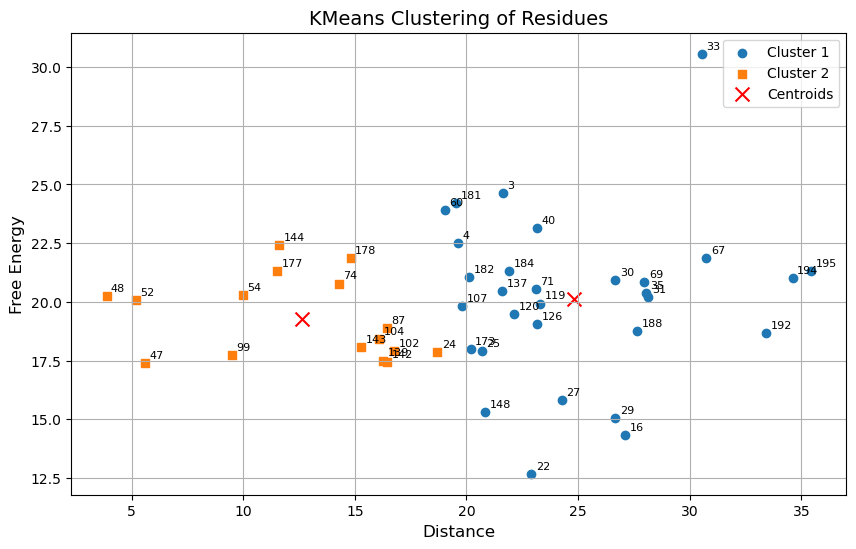

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Prepare data for clustering
selected_residues = [
    (3, 'K', 'N'), (4, 'S', 'R'), (16, 'V', 'I'), (22, 'N', 'L'), (24, 'I', 'L'),
    (25, 'D', 'N'), (27, 'G', 'E'), (29, 'F', 'Y'), (30, 'V', 'I'), (31, 'N', 'Q'),
    (33, 'Q', 'K'), (35, 'Y', 'F'), (40, 'I', 'V'), (47, 'S', 'A'), (48, 'F', 'Y'),
    (52, 'T', 'A'), (54, 'T', 'Q'), (60, 'T', 'A'), (67, 'P', 'N'), (69, 'N', 'G'),
    (71, 'T', 'I'), (74, 'G', 'A'), (87, 'K', 'T'), (99, 'R', 'C'), (102, 'G', 'S'),
    (104, 'Y', 'F'), (107, 'N', 'S'), (119, 'D', 'E'), (120, 'N', 'K'), (126, 'S', 'T'),
    (137, 'E', 'D'), (139, 'F', 'L'), (142, 'P', 'S'), (143, 'E', 'S'), (144, 'H', 'Q'),
    (148, 'D', 'E'), (173, 'R', 'H'), (177, 'H', 'Q'), (178, 'T', 'A'), (181, 'R', 'S'),
    (182, 'I', 'T'), (184, 'Q', 'K'), (188, 'M', 'L'), (192, 'N', 'K'), (194, 'T', 'F'),
    (195, 'S', 'N')
]

# Distances and free energy data
distance_dict = {
    3: 21.63, 4: 19.64, 16: 27.12, 22: 22.91, 24: 18.69, 25: 20.70, 27: 24.28,
    29: 26.66, 30: 26.67, 31: 28.12, 33: 30.54, 35: 28.03, 40: 23.17, 47: 5.59,
    48: 3.88, 52: 5.20, 54: 10.00, 60: 19.05, 67: 30.74, 69: 27.97, 71: 23.11,
    74: 14.29, 87: 16.44, 99: 9.50, 102: 16.77, 104: 16.10, 107: 19.80, 119: 23.30,
    120: 22.14, 126: 23.16, 137: 21.60, 139: 16.28, 142: 16.44, 143: 15.29, 144: 11.60,
    148: 20.84, 173: 20.19, 177: 11.51, 178: 14.81, 181: 19.54, 182: 20.11, 184: 21.90,
    188: 27.64, 192: 33.41, 194: 34.61, 195: 35.43
}

free_energy_dict = {
    3: 24.64, 4: 22.52, 16: 14.34, 22: 12.68, 24: 17.85, 25: 17.89, 27: 15.8,
    29: 15.04, 30: 20.93, 31: 20.22, 33: 30.57, 35: 20.39, 40: 23.14, 47: 17.38,
    48: 20.25, 52: 20.08, 54: 20.30, 60: 23.91, 67: 21.87, 69: 20.83, 71: 20.55,
    74: 20.78, 87: 18.9, 99: 17.74, 102: 17.9, 104: 18.4, 107: 19.84, 119: 19.93,
    120: 19.48, 126: 19.06, 137: 20.45, 139: 17.5, 142: 17.45, 143: 18.09, 144: 22.42,
    148: 15.3, 173: 17.98, 177: 21.33, 178: 21.87, 181: 24.20, 182: 21.07, 184: 21.30,
    188: 18.76, 192: 18.67, 194: 21.00, 195: 21.31
}

# Prepare data for clustering
data = []
residue_indices = []

for residue in selected_residues:
    pos = residue[0]
    if pos in distance_dict and pos in free_energy_dict:
        data.append([distance_dict[pos], free_energy_dict[pos]])
        residue_indices.append(pos)

data = np.array(data)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(data)

# Print the coordinates for each residue
print("Residue Coordinates and Clusters:")
for i, (x, y) in enumerate(data):
    print(f"Residue {residue_indices[i]}: Coordinates = ({x:.2f}, {y:.2f}), Cluster = {clusters[i] + 1}")

# Plot clustering results
plt.figure(figsize=(10, 6))
for i, shape in zip(range(2), ['o', 's']):
    cluster_data = data[clusters == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i + 1}', marker=shape)

# Annotate points
for i, (x, y) in enumerate(data):
    plt.text(x + 0.2, y + 0.2, str(residue_indices[i]), fontsize=8)

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')

# Calculate and print distances to centroids
distances_to_centroids = kmeans.transform(data)
print("Residue Distances to Centroids:")
for i, residue in enumerate(residue_indices):
    cluster_id = clusters[i]
    dist = distances_to_centroids[i, cluster_id]
    print(f"Residue {residue} (Cluster {cluster_id + 1}): Distance to Centroid = {dist:.2f}")

# Add plot labels and legend
plt.xlabel('Distance', fontsize=12)
plt.ylabel('Free Energy', fontsize=12)
plt.title('KMeans Clustering of Residues', fontsize=14)
plt.legend()
plt.grid()
plt.show()


/home/hp/anaconda3/envs/openMM/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Residue Coordinates, Hydrophobicity, Free Energy, and Clusters:
Residue 3: Coordinates = (21.63, 24.64), Hydrophobicity Difference = 0.40, Free Energy = 24.64, Cluster = 1
Residue 4: Coordinates = (19.64, 22.52), Hydrophobicity Difference = -3.70, Free Energy = 22.52, Cluster = 1
Residue 16: Coordinates = (27.12, 14.34), Hydrophobicity Difference = 0.30, Free Energy = 14.34, Cluster = 1
Residue 22: Coordinates = (22.91, 12.68), Hydrophobicity Difference = 7.30, Free Energy = 12.68, Cluster = 1
Residue 24: Coordinates = (18.69, 17.85), Hydrophobicity Difference = -0.70, Free Energy = 17.85, Cluster = 1
Residue 25: Coordinates = (20.70, 17.89), Hydrophobicity Difference = 0.00, Free Energy = 17.89, Cluster = 1
Residue 27: Coordinates = (24.28, 15.80), Hydrophobicity Difference = -3.10, Free Energy = 15.80, Cluster = 1
Residue 29: Coordinates = (26.66, 15.04), Hydrophobicity Difference = -4.10, Free Energy = 15.04, Cluster = 1
Residue 30: Coordinates = (26.67, 20.93), Hydrophobicity Diffe

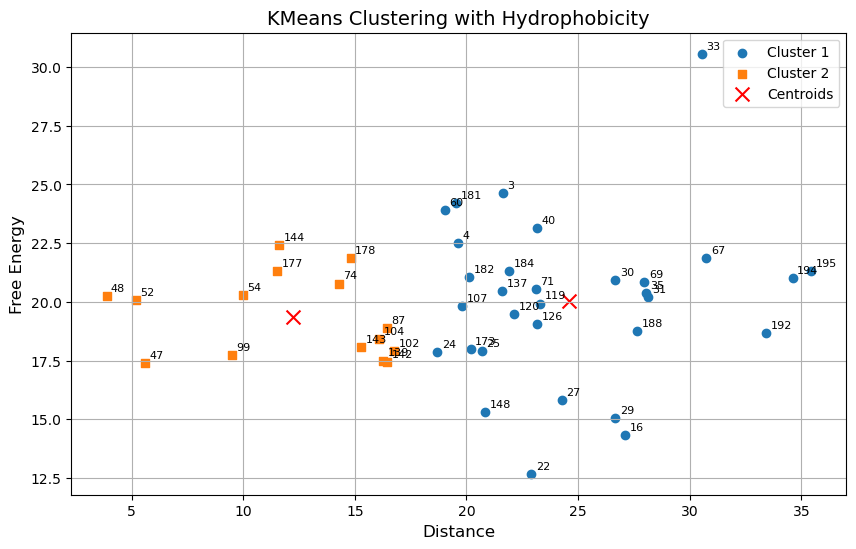

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Hydrophobicity scale
hydrophobicity_scale = {
    'A': 1.8, 'R': -4.5, 'N': -3.5, 'D': -3.5, 'C': 2.5,
    'Q': -3.5, 'E': -3.5, 'G': -0.4, 'H': -3.2, 'I': 4.5,
    'L': 3.8, 'K': -3.9, 'M': 1.9, 'F': 2.8, 'P': -1.6,
    'S': -0.8, 'T': -0.7, 'W': -0.9, 'Y': -1.3, 'V': 4.2
}

# Residues and their distances/free energies
selected_residues = [
    (3, 'K', 'N'), (4, 'S', 'R'), (16, 'V', 'I'), (22, 'N', 'L'), (24, 'I', 'L'),
    (25, 'D', 'N'), (27, 'G', 'E'), (29, 'F', 'Y'), (30, 'V', 'I'), (31, 'N', 'Q'),
    (33, 'Q', 'K'), (35, 'Y', 'F'), (40, 'I', 'V'), (47, 'S', 'A'), (48, 'F', 'Y'),
    (52, 'T', 'A'), (54, 'T', 'Q'), (60, 'T', 'A'), (67, 'P', 'N'), (69, 'N', 'G'),
    (71, 'T', 'I'), (74, 'G', 'A'), (87, 'K', 'T'), (99, 'R', 'C'), (102, 'G', 'S'),
    (104, 'Y', 'F'), (107, 'N', 'S'), (119, 'D', 'E'), (120, 'N', 'K'), (126, 'S', 'T'),
    (137, 'E', 'D'), (139, 'F', 'L'), (142, 'P', 'S'), (143, 'E', 'S'), (144, 'H', 'Q'),
    (148, 'D', 'E'), (173, 'R', 'H'), (177, 'H', 'Q'), (178, 'T', 'A'), (181, 'R', 'S'),
    (182, 'I', 'T'), (184, 'Q', 'K'), (188, 'M', 'L'), (192, 'N', 'K'), (194, 'T', 'F'),
    (195, 'S', 'N')
]

distance_dict = {3: 21.63, 4: 19.64, 16: 27.12, 22: 22.91, 24: 18.69, 25: 20.70, 27: 24.28, 29: 26.66,
                 30: 26.67, 31: 28.12, 33: 30.54, 35: 28.03, 40: 23.17, 47: 5.59, 48: 3.88, 52: 5.20, 54: 10.00,
                 60: 19.05, 67: 30.74, 69: 27.97, 71: 23.11, 74: 14.29, 87: 16.44, 99: 9.50, 102: 16.77, 104: 16.10,
                 107: 19.80, 119: 23.30, 120: 22.14, 126: 23.16, 137: 21.60, 139: 16.28, 142: 16.44, 143: 15.29,
                 144: 11.60, 148: 20.84, 173: 20.19, 177: 11.51, 178: 14.81, 181: 19.54, 182: 20.11, 184: 21.90,
                 188: 27.64, 192: 33.41, 194: 34.61, 195: 35.43}

free_energy_dict = {3: 24.64, 4: 22.52, 16: 14.34, 22: 12.68, 24: 17.85, 25: 17.89, 27: 15.8, 29: 15.04,
                    30: 20.93, 31: 20.22, 33: 30.57, 35: 20.39, 40: 23.14, 47: 17.38, 48: 20.25, 52: 20.08,
                    54: 20.30, 60: 23.91, 67: 21.87, 69: 20.83, 71: 20.55, 74: 20.78, 87: 18.9, 99: 17.74,
                    102: 17.9, 104: 18.4, 107: 19.84, 119: 19.93, 120: 19.48, 126: 19.06, 137: 20.45, 139: 17.5,
                    142: 17.45, 143: 18.09, 144: 22.42, 148: 15.3, 173: 17.98, 177: 21.33, 178: 21.87, 181: 24.20,
                    182: 21.07, 184: 21.30, 188: 18.76, 192: 18.67, 194: 21.00, 195: 21.31}

# Prepare data for clustering
data = []
residue_indices = []
for residue in selected_residues:
    pos, wt, mut = residue
    if pos in distance_dict and pos in free_energy_dict:
        # Calculate hydrophobicity difference
        hydrophobicity_diff = hydrophobicity_scale.get(mut, 0) - hydrophobicity_scale.get(wt, 0)
        data.append([distance_dict[pos], free_energy_dict[pos], hydrophobicity_diff])
        residue_indices.append(pos)

data = np.array(data)

# Perform clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(data)

# Print the cluster details
print("Residue Coordinates, Hydrophobicity, Free Energy, and Clusters:")
for i, (x, y, z) in enumerate(data):
    print(f"Residue {residue_indices[i]}: Coordinates = ({x:.2f}, {y:.2f}), Hydrophobicity Difference = {z:.2f}, Free Energy = {y:.2f}, Cluster = {clusters[i] + 1}")

# Plot clustering results
plt.figure(figsize=(10, 6))
for i, shape in zip(range(2), ['o', 's']):
    cluster_data = data[clusters == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i + 1}', marker=shape)

# Annotate points
for i, (x, y, z) in enumerate(data):
    plt.text(x + 0.2, y + 0.2, str(residue_indices[i]), fontsize=8)

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')

# Add plot labels and legend
plt.xlabel('Distance', fontsize=12)
plt.ylabel('Free Energy', fontsize=12)
plt.title('KMeans Clustering with Hydrophobicity', fontsize=14)
plt.legend()
plt.grid()
plt.show()
